## Proyecto final Data Science -  04/2023




## Objetivo: 
Aplicar distintos algoritmos de Machine learning que puedan predecir si una persona tiene o no la enfermedad de diabetes, en funcion a los atributos utilizados como input del modelo. 


## Contexto: 
Contamos con un informe donde se estudió un grupo de personas y se guardaron datos sobre determinados indicadores de salud. Los siguientes datos estan etiquetados, contamos con una variable que nos dice si los encuestados tienen diabetes, no tienen diabetes o tienen pre diabetes.

Si bien no existe una cura para la diabetes, estrategias como perder peso, comer sano, mantenerse activo y recibir tratamientos médicos pueden mitigar los daños de esta enfermedad en muchos pacientes. El diagnóstico temprano puede conducir a cambios en el estilo de vida y a un tratamiento más eficaz, lo que convierte a los modelos predictivos del riesgo de diabetes en herramientas importantes para el público y los funcionarios de salud pública.

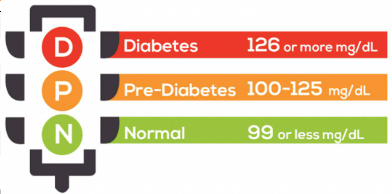

In [500]:
from IPython.display import Image
Image(filename='Desktop/true.png') 

## Explicación de las columnas: 

Diabetes_012: tiene 3 clases, 0 es sin diabetes o solo durante el embarazo, 1 es para prediabetes y 2 es para diabetes 

presión_arterial: Paciente con presión arterial alta (0,1). 

colesterol: Paciente con colesterol alto (0,1). 

control_colesterol: control de colesterol en los últimos cinco años (0,1)

IMC: Indice de masa corporal 

Fumador: ¿Ha fumado al menos 100 cigarrillos en toda su vida? (0,1) 

ACV: Paciente que sufrió un ACV (0,1) Infarto: Paciente que sufrió un infarto (0,1) 

actividad_fisica: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual. (0,1) 

consume_fruta: Consume una fruta o mas por día (0,1) 

consume_verdura: Consume verduras una o mas veces por día (0,1)

consumo_alcohol: Grandes bebedores (hombres adultos que toman más de 14 tragos por semana y mujeres adultas que toman más de 7 tragos por semana) (0,1) 

obra_social: Paciente con obra social (0,1) 

costo_salud: ¿Hubo algún momento en los últimos 12 meses en que necesitó ver a un médico pero no pudo debido al costo? (0,1)

ratio_salud: Paciente califica que en general su salud es: califique (1 ~ 5) 

dias_saludmental: salud mental, que incluye estrés, depresión y problemas con las emociones, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0 ~ 30) 

dias_saludfisica: salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días durante los últimos 30 días su salud física no fue buena? (0 ~ 30) 

dificultad_caminar: ¿Tiene serias dificultades para caminar o subir escaleras? (0,1) 

Sexo: el sexo del encuestado (0,1) (Femenino o Masculino) 

Edad: Categoría de edad de catorce niveles (1 ~ 14) 

Educación: ¿Cuál es el grado o año escolar más alto que completó? (1 ~ 6) 

Ingresos: Ingreso familiar anual proveniente de todas las fuentes (Si el encuestado se niega en cualquier nivel de ingresos, codifique "Rechazado") (1 ~ 8) (USD)

fuente: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## Importamos las librerias 

In [438]:
#Librerias basicas
import pandas as pd
import numpy as np
import math


#Librerias de visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias de ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
import lightgbm as lgb



#Librerias de Metricas 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Otras
import joblib
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

## Carga del dataset y primer acercamiento a los datos 

In [268]:
data = pd.read_csv("diabetes_indicators.csv") 


In [269]:
data.shape

(253680, 22)

In [270]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [271]:
data.sample(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
95284,0.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
117558,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,7.0
66932,0.0,1.0,0.0,1.0,29.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,2.0,30.0,1.0,1.0,7.0,5.0,4.0
25778,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,5.0,6.0
39297,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0


In [272]:
data.dtypes 

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Transformación de tipo de datos de las columnas 

In [273]:
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [274]:
data.dtypes 

Diabetes_012            int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object

## Chequeo de nulos 

In [275]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Chequeo de duplicados

In [276]:
data.duplicated().sum()

23899

In [277]:
data.drop_duplicates(inplace = True) #eliminamos los duplicados 

In [278]:
data.duplicated().sum()

0

In [279]:
data.shape

(229781, 22)

## Renombramos las columnas

In [280]:
data = data.rename(columns={'HighBP':'presión_arterial', 'HighChol': 'colesterol', 'CholCheck':'control_colesterol', 
                           'BMI': 'IMC', 'Smoker':'Fumador', 'Stroke': 'ACV', 'HeartDiseaseorAttack': 'Infarto',
                           'PhysActivity':'actividad_fisica','Fruits':'consume_fruta','Veggies':'consume_verduras',
                           'HvyAlcoholConsump':'consumo_alcohol', 'AnyHealthcare': 'obra_social', 'NoDocbcCost': 'costo_salud',
                           'GenHlth': 'ratio_salud','MentHlth': 'dias_saludmental', 'PhysHlth': 'dias_saludfisica',
                          'DiffWalk':'dificultad_caminar', 'Sex': 'Sexo', 'Age': 'Edad', 'Education': 'Educacion', 'Income': 'Ingresos' }) 

In [281]:
data.head(3)

,Diabetes_012,presión_arterial,colesterol,control_colesterol,IMC,Fumador,ACV,Infarto,actividad_fisica,consume_fruta,consume_verduras,consumo_alcohol,obra_social,costo_salud,ratio_salud,dias_saludmental,dias_saludfisica,dificultad_caminar,Sexo,Edad,Educacion,Ingresos
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8


Los casos de pre diabetes lo tomaremos como diabetes para englobar la clasificacion en diabetico o no diabetico 

In [282]:
data['Diabetes_012'].unique()

array([0, 2, 1])

In [283]:
data.Diabetes_012 = data.Diabetes_012.replace({2: 1})

In [284]:
data = data.rename(columns={'Diabetes_012':'Diabetes'})

In [285]:
data.head(2)

,Diabetes,presión_arterial,colesterol,control_colesterol,IMC,Fumador,ACV,Infarto,actividad_fisica,consume_fruta,consume_verduras,consumo_alcohol,obra_social,costo_salud,ratio_salud,dias_saludmental,dias_saludfisica,dificultad_caminar,Sexo,Edad,Educacion,Ingresos
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1


In [286]:
data1 = data.copy() #realizamos una copia de los datos originales 

## Modificamos las columnas para mejorar la lectura de los datos 

In [287]:
data1.Edad[data['Edad'] == 1] = '18-24'
data1.Edad[data['Edad'] == 2] = '25-29'
data1.Edad[data['Edad'] == 3] = '30-4'
data1.Edad[data['Edad'] == 4] = '35-39'
data1.Edad[data['Edad'] == 5] = '40-44'
data1.Edad[data['Edad'] == 6] = '45-49'
data1.Edad[data['Edad'] == 7] = '50-54'
data1.Edad[data['Edad'] == 8] = '55-59'
data1.Edad[data['Edad'] == 9] = '60-64'
data1.Edad[data['Edad'] == 10] = '65-69'
data1.Edad[data['Edad'] == 11] = '70-74'
data1.Edad[data['Edad'] == 12] = '75-79'
data1.Edad[data['Edad'] == 13] = '80-85'
data1.Edad[data['Edad'] == 14] = '+85'

In [288]:
data1.presión_arterial[data['presión_arterial'] == 0] = 'No'
data1.presión_arterial[data['presión_arterial'] == 1] = 'Si'

In [289]:
data1.colesterol[data['colesterol'] == 0] = 'No'
data1.colesterol[data['colesterol'] == 1] = 'Si'

In [290]:

data1.control_colesterol[data['control_colesterol'] == 0] = 'No'
data1.control_colesterol[data['control_colesterol'] == 1] = 'Si'


In [291]:
data1.Fumador[data['Fumador'] == 0] = 'No'
data1.Fumador[data['Fumador'] == 1] = 'Si'

In [292]:
data1.ACV[data['ACV'] == 0] = 'No'
data1.ACV[data['ACV'] == 1] = 'Si'

In [293]:
data1.actividad_fisica[data['actividad_fisica'] == 0] = 'No'
data1.actividad_fisica[data['actividad_fisica'] == 1] = 'Si'


In [294]:
data1.consume_fruta[data['consume_fruta'] == 0] = 'No'
data1.consume_fruta[data['consume_fruta'] == 1] = 'Si'

In [295]:
data1.consume_verduras[data['consume_verduras'] == 0] = 'No'
data1.consume_verduras[data['consume_verduras'] == 1] = 'Si'

In [296]:
data1.consumo_alcohol[data['consumo_alcohol'] == 0] = 'No'
data1.consumo_alcohol[data['consumo_alcohol'] == 1] = 'Si'

In [297]:
data1.consumo_alcohol[data['consumo_alcohol'] == 0] = 'No'
data1.consumo_alcohol[data['consumo_alcohol'] == 1] = 'Si'

In [298]:
data1.obra_social[data['obra_social'] == 0] = 'No'
data1.obra_social[data['obra_social'] == 1] = 'Si'

In [299]:
data1.Sexo[data['Sexo'] == 0] = 'Mujer'
data1.Sexo[data['Sexo'] == 1] = 'Hombre'

In [300]:
data1.ratio_salud[data['ratio_salud'] == 5] = 'Excelente'
data1.ratio_salud[data['ratio_salud'] == 4] = 'Muy buena'
data1.ratio_salud[data['ratio_salud'] == 3] = 'Buena'
data1.ratio_salud[data['ratio_salud'] == 2] = 'Mala'
data1.ratio_salud[data['ratio_salud'] == 1] = 'Muy mala'

In [301]:
data1.dificultad_caminar[data['dificultad_caminar'] == 0] = 'No'
data1.dificultad_caminar[data['dificultad_caminar'] == 1] = 'Si'

In [302]:
data1.costo_salud[data['costo_salud'] == 0] = 'No'
data1.costo_salud[data['costo_salud'] == 1] = 'Si'

In [303]:
data1.Infarto[data['Infarto'] == 0] = 'No'
data1.Infarto[data['Infarto'] == 1] = 'Si'

In [304]:
data1.Educacion[data['Educacion'] == 1] = 'Nunca asistió a la escuela'
data1.Educacion[data['Educacion'] == 2] = 'Primario o secundario incompleto'
data1.Educacion[data['Educacion'] == 3] = 'Primario completo'
data1.Educacion[data['Educacion'] == 4] = 'Secundario completo'
data1.Educacion[data['Educacion'] == 5] = 'Universitario'
data1.Educacion[data['Educacion'] == 6] = 'Doctorado-Posgrado'

In [305]:
data1.IMC[data['IMC'] <= 18.5 ] = 'peso insuficiente'
data1.IMC[(data['IMC'] > 18.5) & (data['IMC'] <= 24.9)  ] = 'peso saludable'
data1.IMC[(data['IMC'] >= 25) & (data['IMC'] <= 29.9)  ] = 'sobrepeso'
data1.IMC[data['IMC'] >= 30] = 'obesidad'


## EDA

Pintamos el mapa de calor para comprender mejor la correlación en los datos 


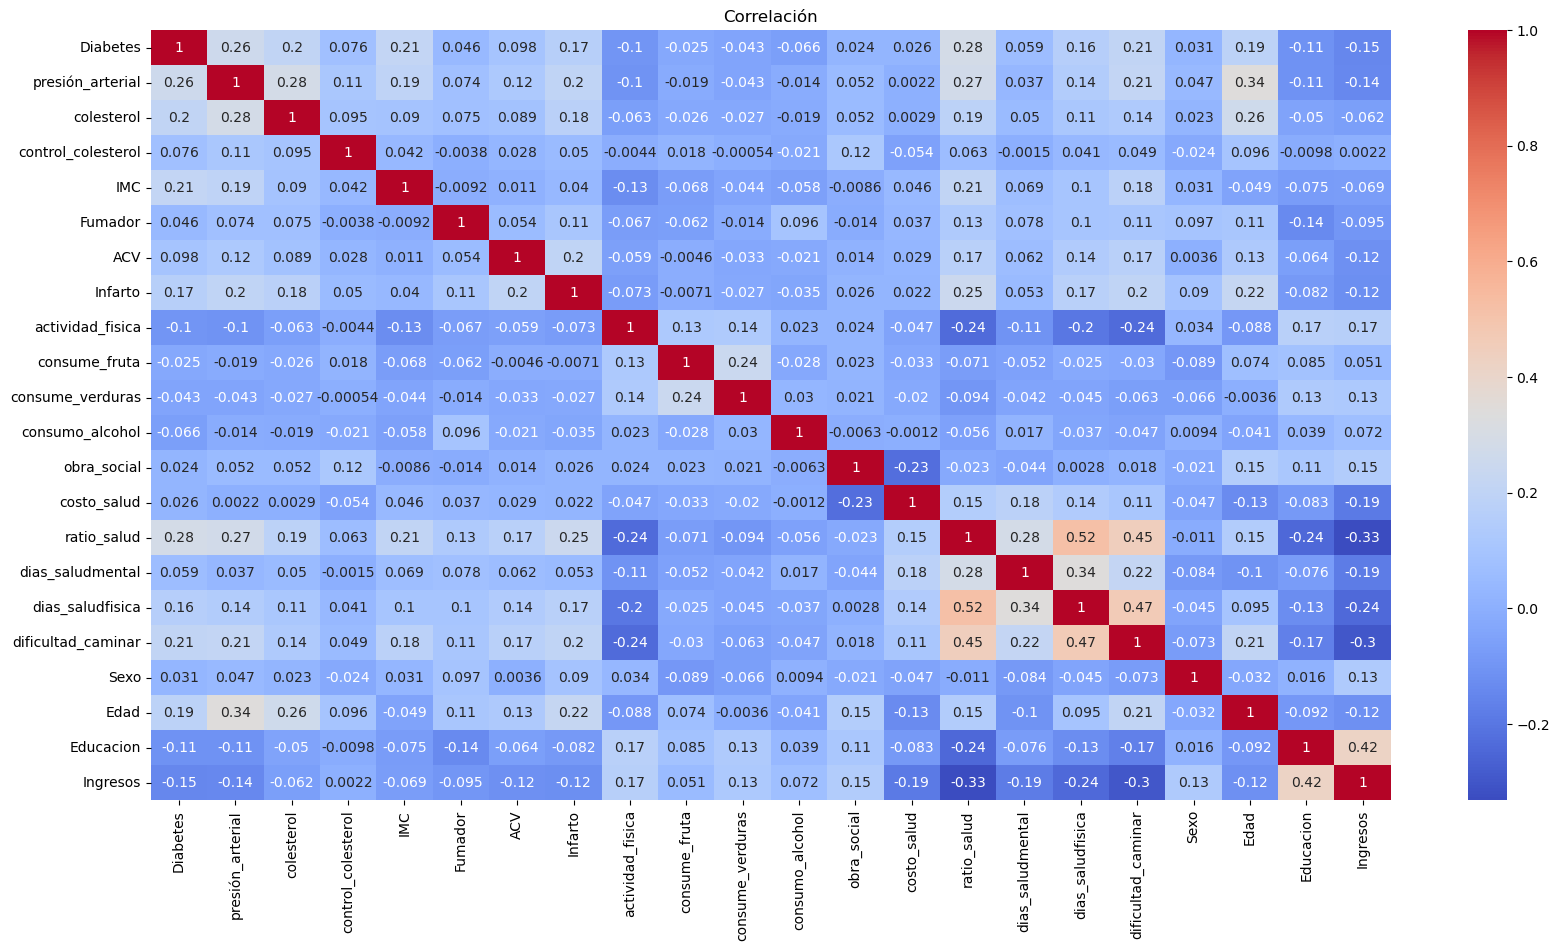

In [306]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='coolwarm' )
plt.title("Correlación")
plt.show()

El mapa de calor de correlación muestra la relación entre las columnas. Correlaciones entre 0.5 y 0.8 son correlaciones moderadas y no permiten tomar decisiones muy claras y correlaciones por encima del 0.8 son altas y sí que implican una clara correlación entre ambas variables. En nuestro dataset podemos observar una correlación moderada entre dias de salud fisica y el ratio de salud, lo cual tiene sentido ya que ambas columnas hablan de la percepción del encuestado de su estado de salud.

Graficamos el histograma para comprender mejor los datos de las columnas 

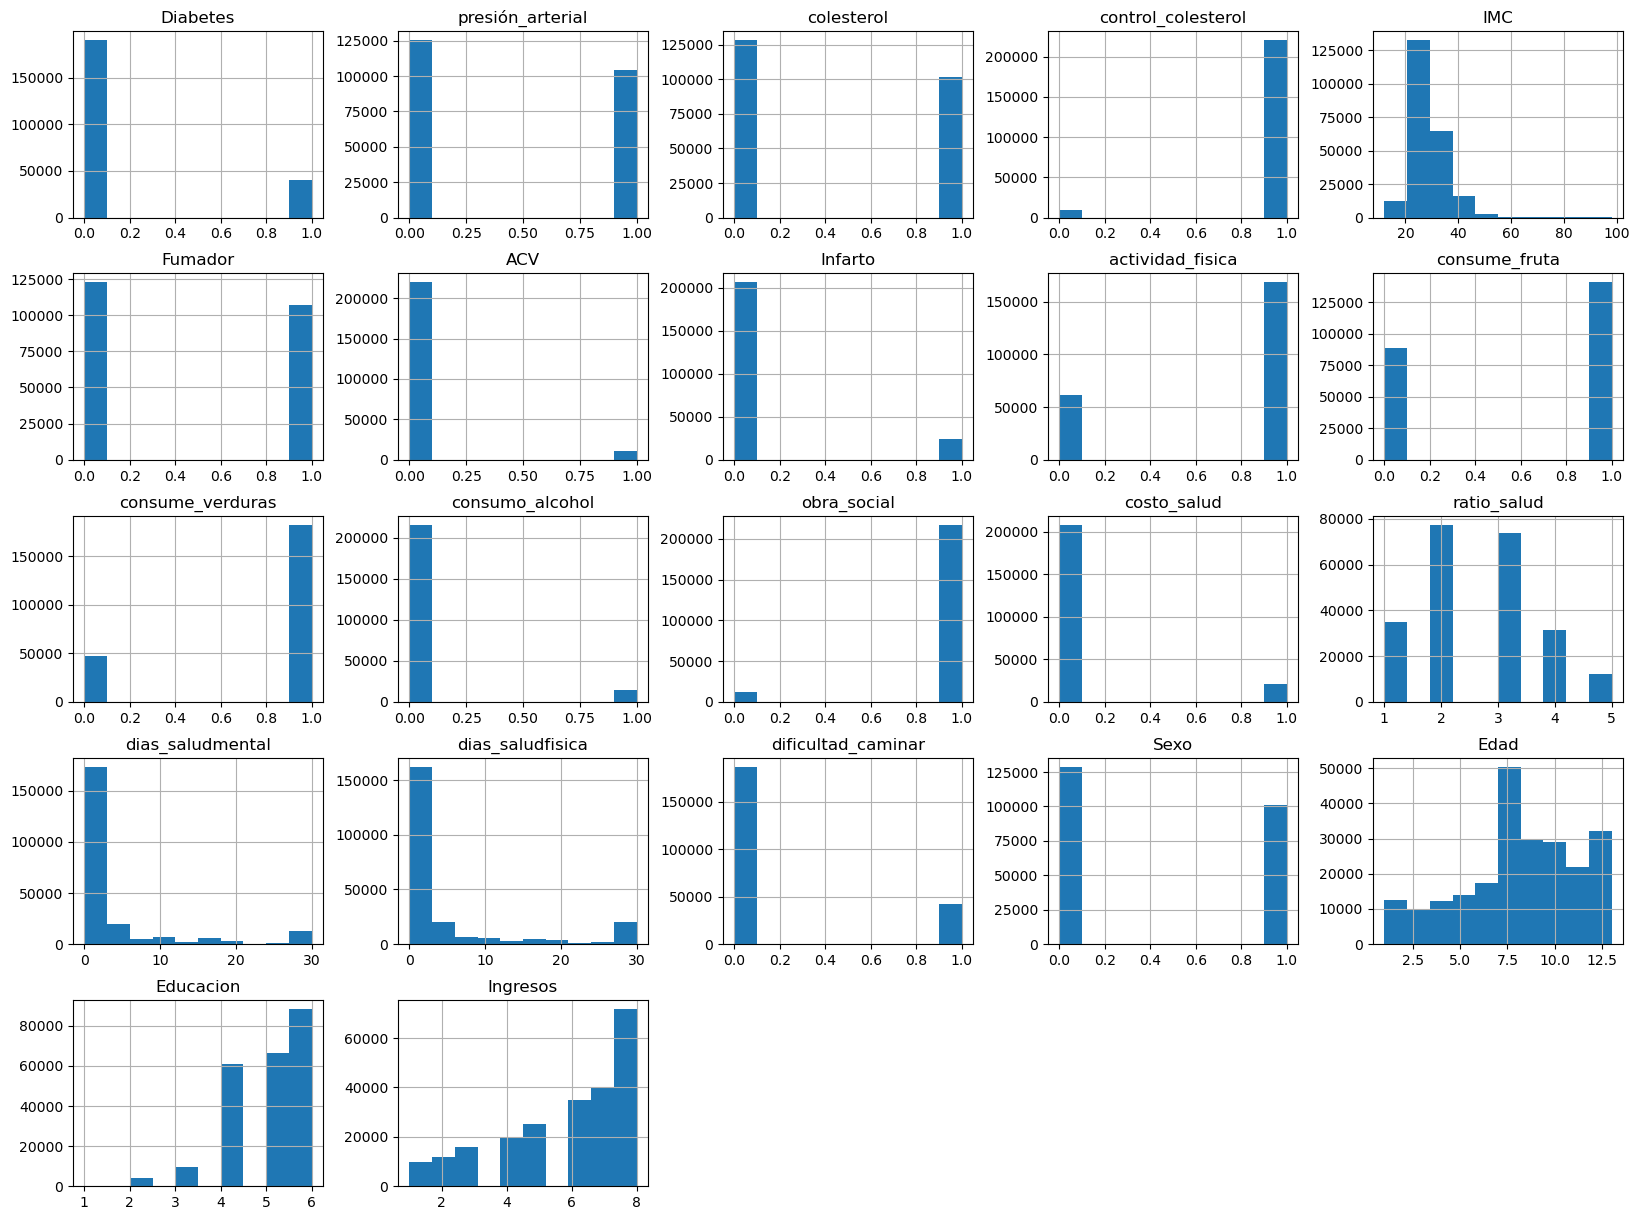

In [307]:
data.hist(figsize=(20,15))
plt.show()

De los gráficos podemos observar:

    1) hay mas cantidad de mujeres que de hombres en el estudio
    2) La mayoría de los encuestados consume frutas y verduras, y una pequeña cantidad consume alcohol
    3) La mayoría de los encuestados logro un nivel de educacion superior
    4) La mayoría de los encuestados tiene obra social
    5) La mayoría de los encuestados no tuvo problemas para abonar una consulta médica en los últimos 12 meses
    6) En el histograma de la columna ratio_salud, vemos que la categoría con mas resultados es la que percibe su salud como mala 
    7) Podemos ver una similitud en la distribución de los días de salud fisica y días de salud mental, por lo que podemos   inferir que quienes perciben su salud fisica en dias como mala o buena, perciben de igual forma su salud  mental. 
    8) La mayoría de los encuestados tiene un IMC entre un rango de 20 a 30 
    9) La mayoría de los encuestados informo realizar actividad fisica 
    10) Existe un desbalance entre las clases diabetico y no diabetico 

## Detección de outliers

In [308]:
data.columns

Index(['Diabetes', 'presión_arterial', 'colesterol', 'control_colesterol',
       'IMC', 'Fumador', 'ACV', 'Infarto', 'actividad_fisica', 'consume_fruta',
       'consume_verduras', 'consumo_alcohol', 'obra_social', 'costo_salud',
       'ratio_salud', 'dias_saludmental', 'dias_saludfisica',
       'dificultad_caminar', 'Sexo', 'Edad', 'Educacion', 'Ingresos'],
      dtype='object')

Consideremos solo los atributos cuya respuesta puede ser distinta de 0 y 1 

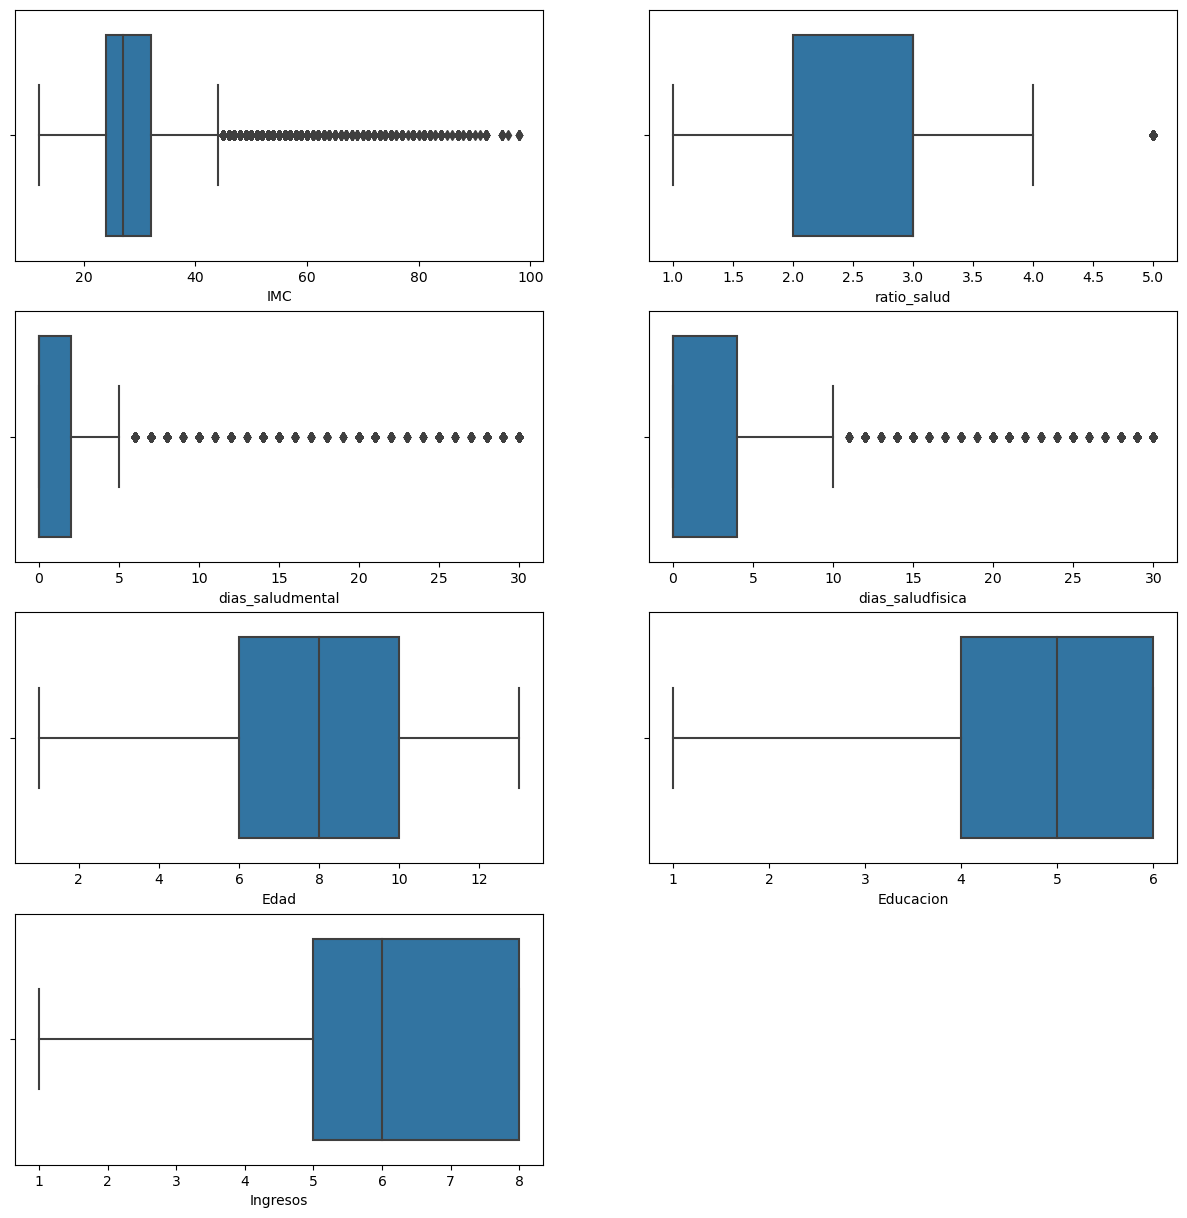

In [309]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['IMC', 'ratio_salud', 'dias_saludmental', 'dias_saludfisica', 'Edad','Educacion', 'Ingresos']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data )
plt.show()

In [310]:
variables_outliers = data[['IMC', 'ratio_salud', 'dias_saludmental', 'dias_saludfisica']]

<AxesSubplot:xlabel='IMC', ylabel='Density'>

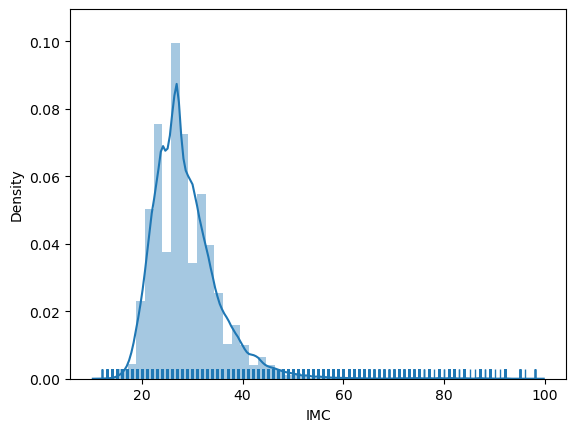

In [311]:
sns.distplot(data['IMC'], hist=True, kde=True, rug=True)

<AxesSubplot:xlabel='ratio_salud', ylabel='Density'>

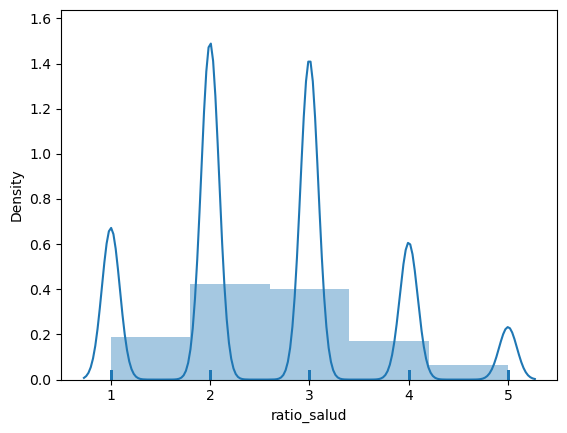

In [312]:
sns.distplot(data['ratio_salud'], hist=True, kde=True, rug=True, bins=5)

<AxesSubplot:xlabel='dias_saludfisica', ylabel='Density'>

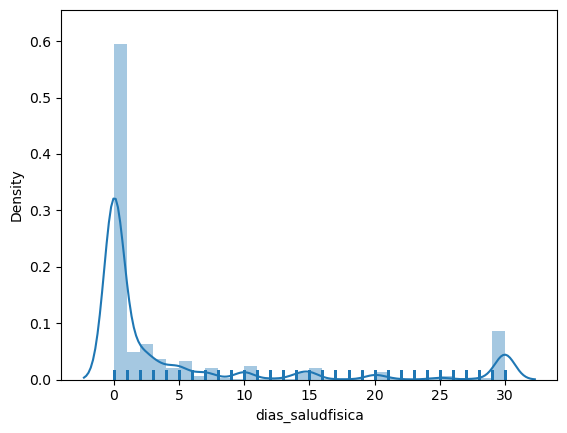

In [313]:
sns.distplot(data['dias_saludfisica'], hist=True, kde=True, rug=True, bins=30)

<AxesSubplot:xlabel='dias_saludmental', ylabel='Density'>

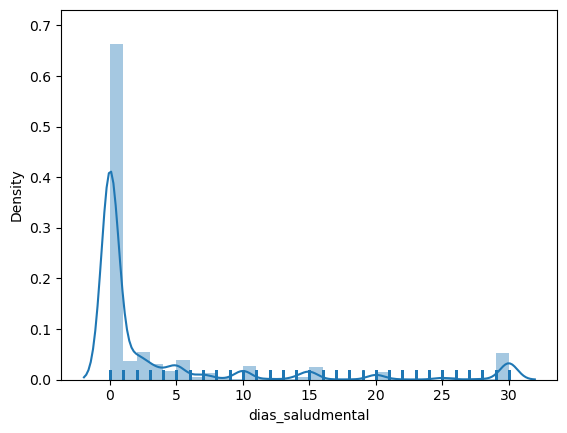

In [314]:
sns.distplot(data['dias_saludmental'], hist=True, kde=True, rug=True, bins=30)

In [315]:
#Media vs mediana
mean = variables_outliers.mean(axis=0)
median = variables_outliers.median(axis=0)

pd.concat([mean, median, mean-median], axis=1, keys=["Media", "Mediana", "Diferencia"])

,Media,Mediana,Diferencia
IMC,28.685670,27.0,1.685670
ratio_salud,2.601151,3.0,-0.398849
dias_saludmental,3.505373,0.0,3.505373
dias_saludfisica,4.675178,0.0,4.675178


In [316]:
#Obtener 1.5 el rango intercuartilico
iqrx15 = (variables_outliers.quantile(.75)-variables_outliers.quantile(.25))*1.5
#Obtener los valores maximos
maxs = variables_outliers.max()
#Obtener los valores minimos
mins = variables_outliers.min()
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = median+iqrx15
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = median-iqrx15
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs>sup
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = mins<inf
#Mostramos para que variables existen valores atipicos
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
IMC,True,True
ratio_salud,True,True
dias_saludmental,True,False
dias_saludfisica,True,False


Un enfoque común para manejar los valores atípicos es simplemente eliminarlos de nuestro conjunto de datos. Este método puede ser efectivo si los valores atípicos son pocos y pueden identificarse claramente. Sin embargo, este enfoque puede no ser siempre la mejor opción, ya que puede provocar la pérdida de datos valiosos y potencialmente sesgar las predicciones de nuestro modelo.
Para este proyecto en particular no vamos  a eliminar los valores atípicos, sino que vamos a utilizar la técnica de transformación logarítmica. Se aplicará esta técnica en los atributos IMC y ratio_salud que cuentan con outliers superiores e inferiores. Las columnas dias de salud mental y física no se van a transformar, pero se normalizarán con Standar Scaler antes de entrenar los modelos. 


<AxesSubplot:xlabel='IMC', ylabel='Density'>

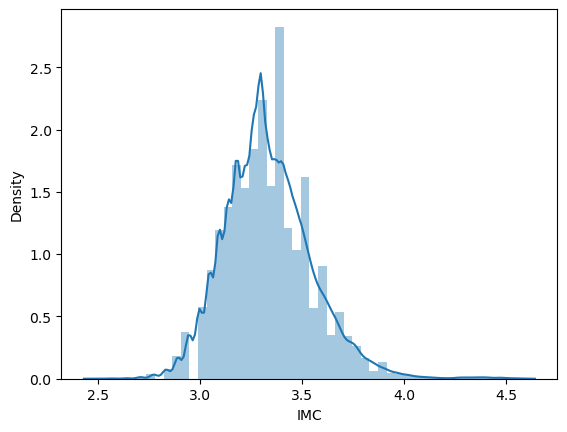

In [317]:
a=np.log(data['IMC'])
sns.distplot(a)

<AxesSubplot:xlabel='ratio_salud', ylabel='Density'>

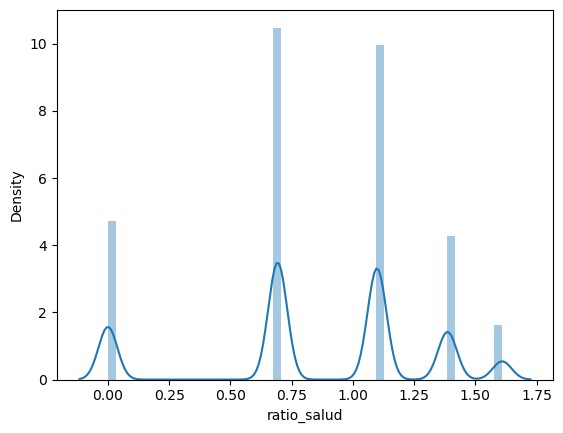

In [318]:
b=np.log(data['ratio_salud'])
sns.distplot(b)

In [319]:
data['IMC']= a 

In [320]:
data['ratio_salud'] = b

## Hipótesis planteadas: 

A mayor edad mayor riesgo de tener diabetes?

La presión alta aumenta el riesgo de tener diabetes? 

El colesterol alto aumenta el riesgo de tener diabetes?

Ser fumador aumenta el riesgo de tener diabetes?

Haber sufrido un AVC o Infarto aumenta el riesgo de tener diabetes?

No consumir frutas y verduras aumenta el riesgo de tener diabetes?

Consumir alcohol aumenta el riesgo de tener diabetes?

No realizar actividad física aumenta el riesgo de tener diabetes?

Las personas con dificultad para caminar tienen mayor riesgo de tener diabetes? 

Existe alguna relacion entre el nivel de ingresos de los encuestados y la enfermedad de diabetes?

Existe alguna relación entre el nivel de estudios de los encuestados y la enfermedad de diabetes?

Como es la relacion entre el genero y la enfermedad de diabetes?

Las personas con IMC entre 25.0 y 29.9 (sobrepeso) o IMC mayor a 30.0 (obesidad) tienen mayor riesgo de tener diabetes?

Existe relación entre el ratio de salud y los días de salud fisica y mental descriptos por los encuestados?


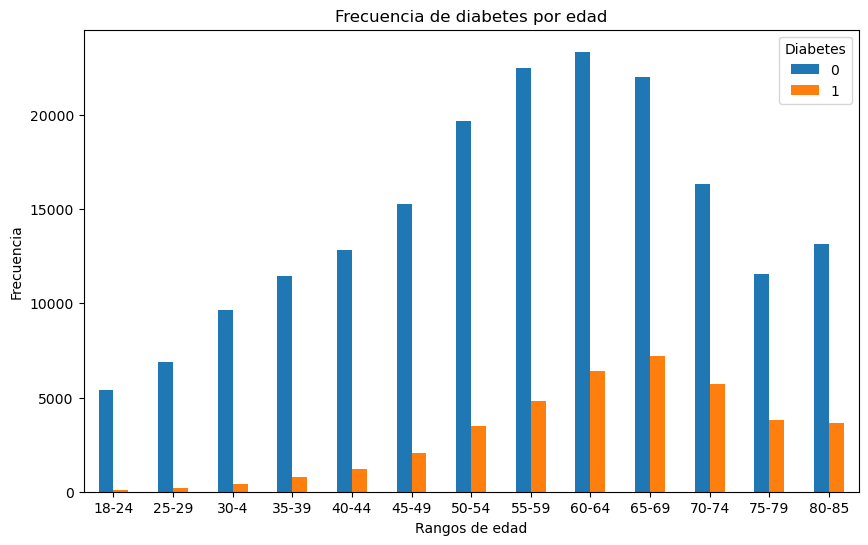

In [52]:
pd.crosstab(data1.Edad,data1.Diabetes).plot(kind="bar",figsize=(10,6))
plt.title('Frecuencia de diabetes por edad')
plt.xlabel('Rangos de edad')
plt.xticks(rotation=0)
plt.ylabel('Frecuencia')
plt.show()

Sabemos que a medida que aumenta la edad, las posibilidades de tener diabetes también aumentan comúnmente. De lo anterior podemos decir, la mediana de la edad de las personas diabéticas es mayor que la de las personas no diabéticas.

Visualización de Columnas [Si - NO] y su relación con el target

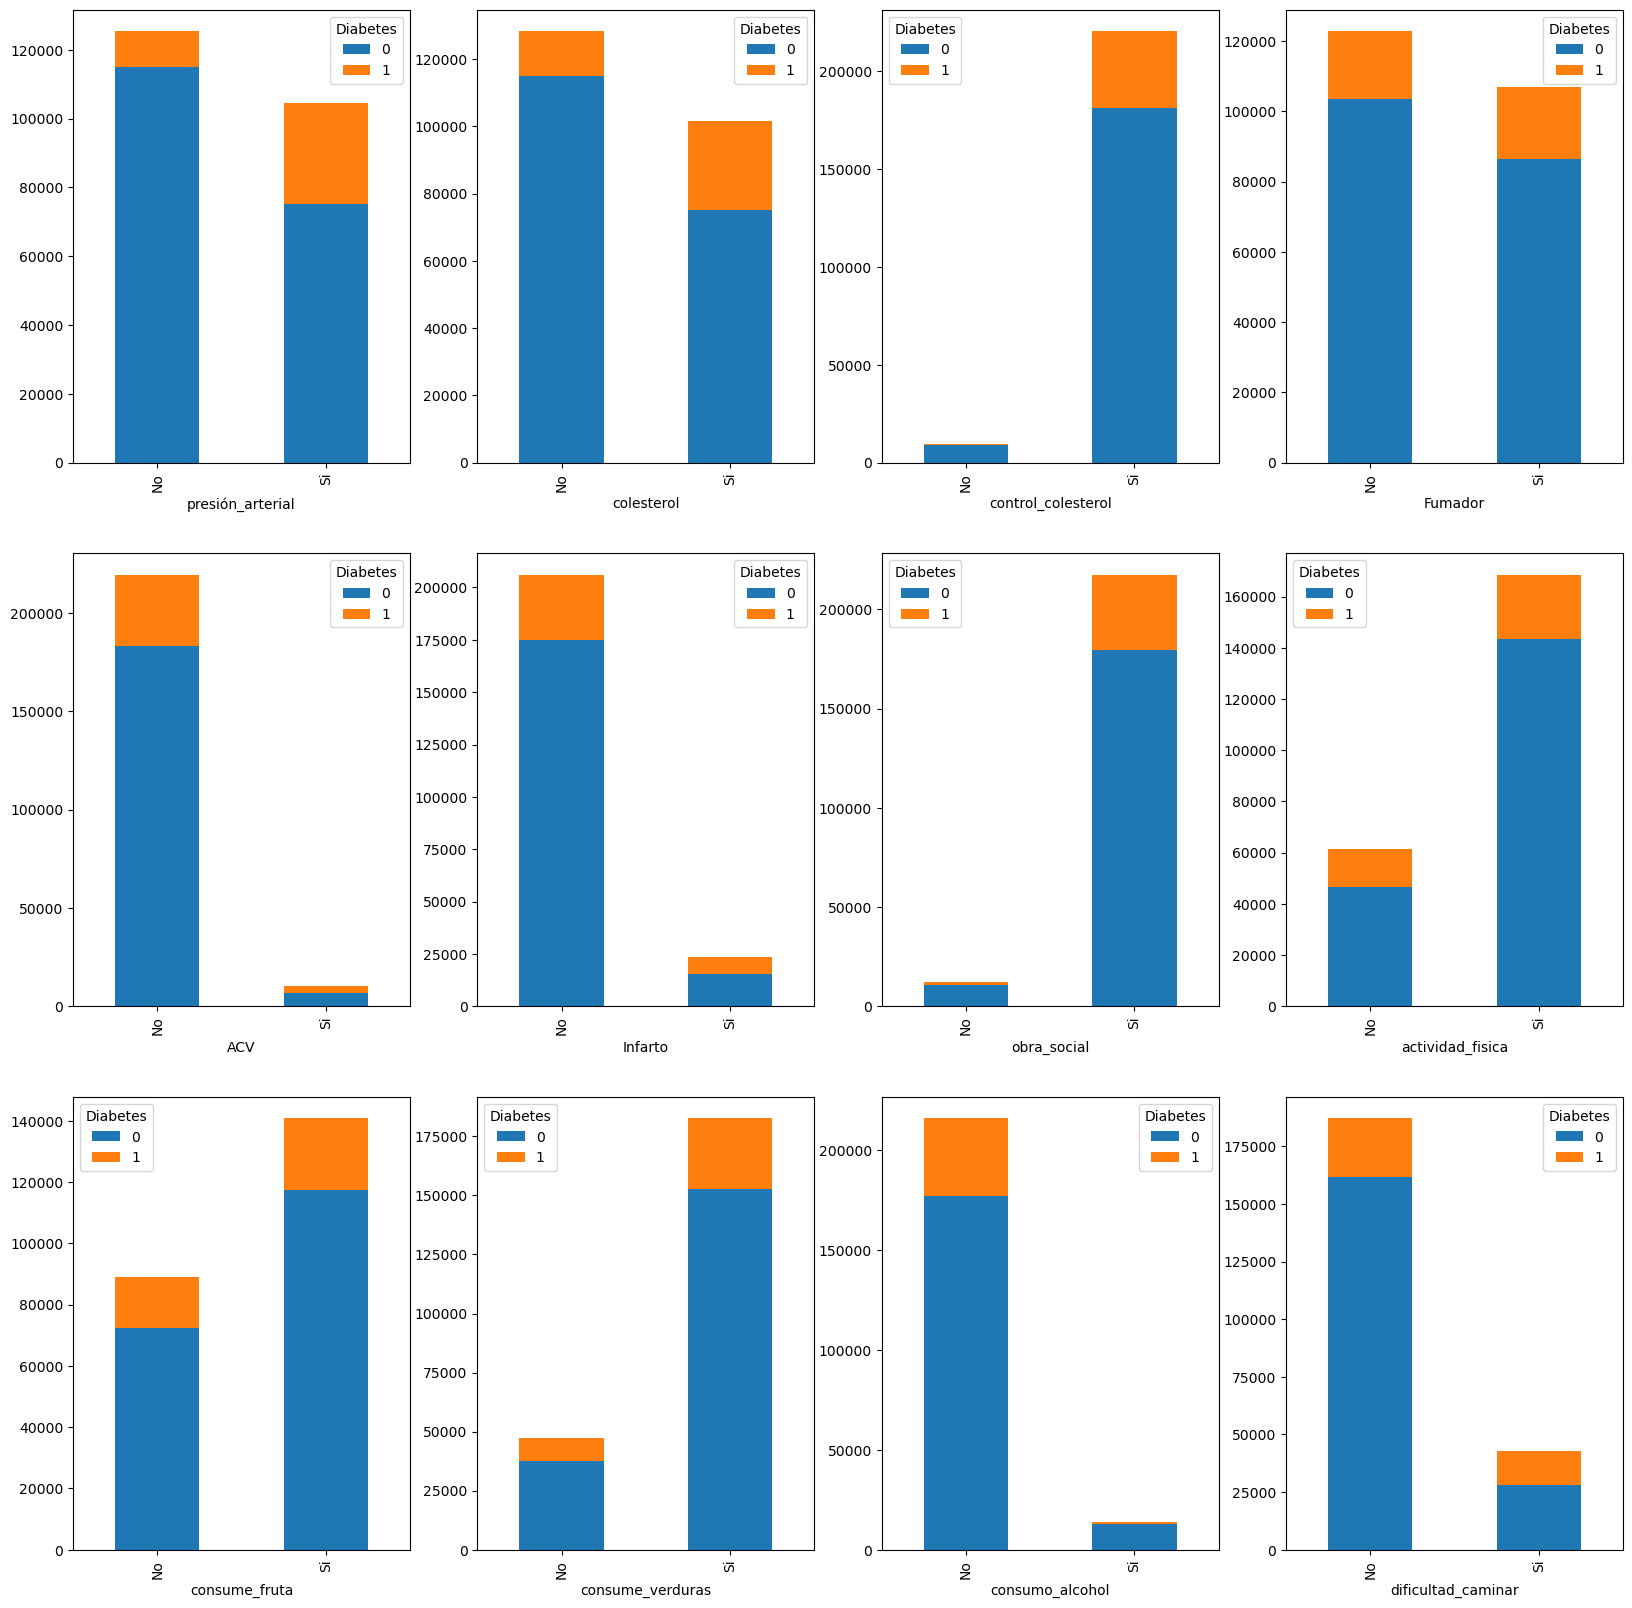

In [53]:
cols = ['presión_arterial','colesterol', 'control_colesterol', 'Fumador', 'ACV', 'Infarto','obra_social',
        'actividad_fisica','consume_fruta','consume_verduras','consumo_alcohol','dificultad_caminar']

def create_plot_pivot(data, x_column):
    _df_plot = data1.groupby([x_column, 'Diabetes']).size() \
    .reset_index().pivot(columns='Diabetes', index=x_column, values=0)
    return _df_plot
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

**Presión arterial**

In [84]:
data1.groupby(['Diabetes','presión_arterial'])['Diabetes'].agg(Count='count')

Count
Diabetes presión_arterial        
0        No                114950
         Si                 75105
1        No                 10409
         Si                 29317

In [85]:
(data[data['Diabetes']==0]['presión_arterial']
 .value_counts(1)
 .sort_index())

0    0.604825
1    0.395175
Name: presión_arterial, dtype: float64

In [86]:
(data[data['Diabetes']==1]['presión_arterial']
 .value_counts(1)
 .sort_index())

0    0.26202
1    0.73798
Name: presión_arterial, dtype: float64

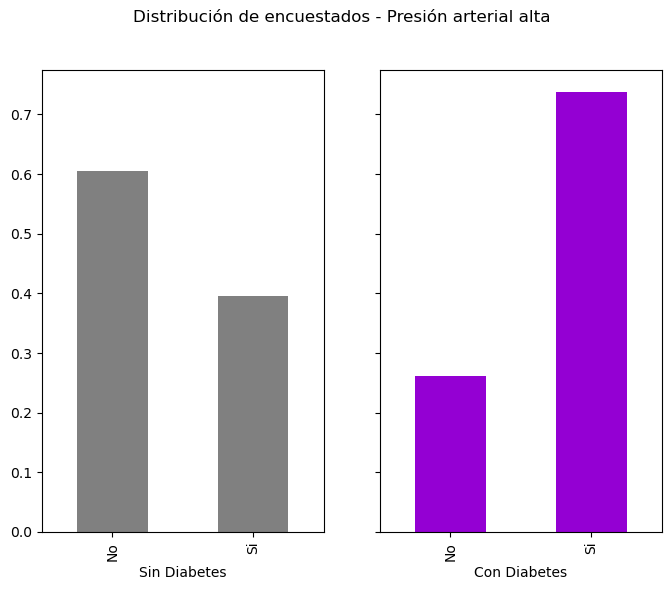

In [89]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Presión arterial alta')
(data[data['Diabetes']==0]['presión_arterial']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['presión_arterial']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 73% de los encuestados con diabetes tienen presion arterial alta, contra un 40% de quienes no tienen diabetes.

**Colesterol**

In [198]:
(data[data['Diabetes']==0]['colesterol']
 .value_counts(1)
 .sort_index())

0    0.604651
1    0.395349
Name: colesterol, dtype: float64

In [200]:
(data[data['Diabetes']==1]['colesterol']
 .value_counts(1)
 .sort_index())

0    0.336203
1    0.663797
Name: colesterol, dtype: float64

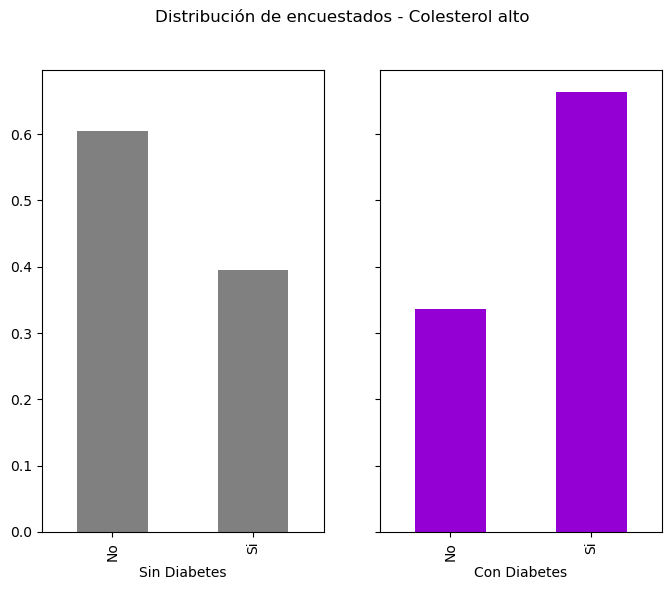

In [90]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Colesterol alto')
(data[data['Diabetes']==0]['colesterol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['colesterol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 66% de los encuestados con diabetes tienen colesterol alto, contra un 40% de quienes no tienen diabetes.

**ACV**

In [207]:
(data[data['Diabetes']==0]['ACV']
 .value_counts(1)
 .sort_index())

0    0.964479
1    0.035521
Name: ACV, dtype: float64

In [208]:
(data[data['Diabetes']==1]['ACV']
 .value_counts(1)
 .sort_index())

0    0.911066
1    0.088934
Name: ACV, dtype: float64

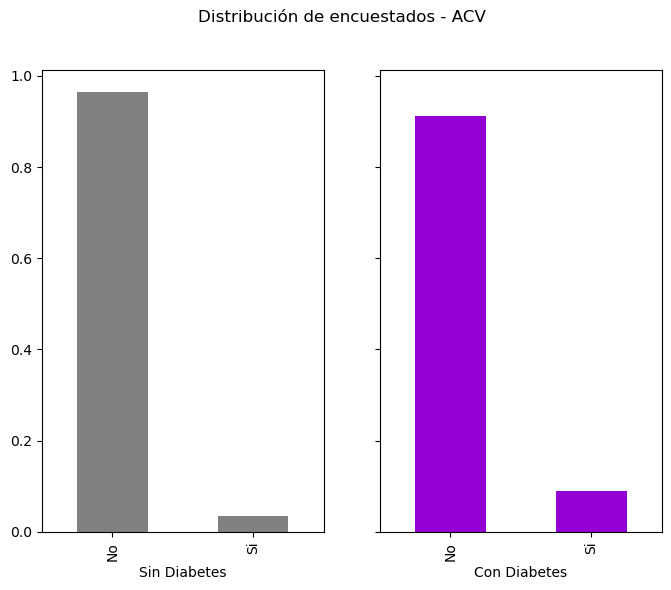

In [91]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - ACV')
(data[data['Diabetes']==0]['ACV']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['ACV']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 8% de los encuestados con diabetes sufieron un ACV, contra un 3% de quienes no tienen diabetes.

**Infarto**

In [210]:
(data[data['Diabetes']==0]['Infarto']
 .value_counts(1)
 .sort_index())

0    0.920039
1    0.079961
Name: Infarto, dtype: float64

In [211]:
(data[data['Diabetes']==1]['Infarto']
 .value_counts(1)
 .sort_index())

0    0.785531
1    0.214469
Name: Infarto, dtype: float64

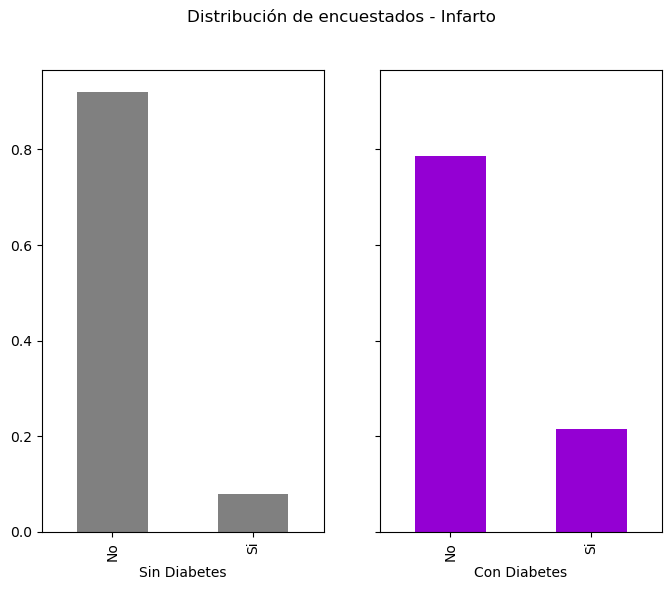

In [92]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Infarto')
(data[data['Diabetes']==0]['Infarto']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['Infarto']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 21% de los encuestados con diabetes sufieron un Infarto, contra un 7% de quienes no tienen diabetes.

**Dificultad para caminar**

In [216]:
(data[data['Diabetes']==0]['dificultad_caminar']
 .value_counts(1)
 .sort_index())

0    0.85148
1    0.14852
Name: dificultad_caminar, dtype: float64

In [217]:
(data[data['Diabetes']==1]['dificultad_caminar']
 .value_counts(1)
 .sort_index())

0    0.637542
1    0.362458
Name: dificultad_caminar, dtype: float64

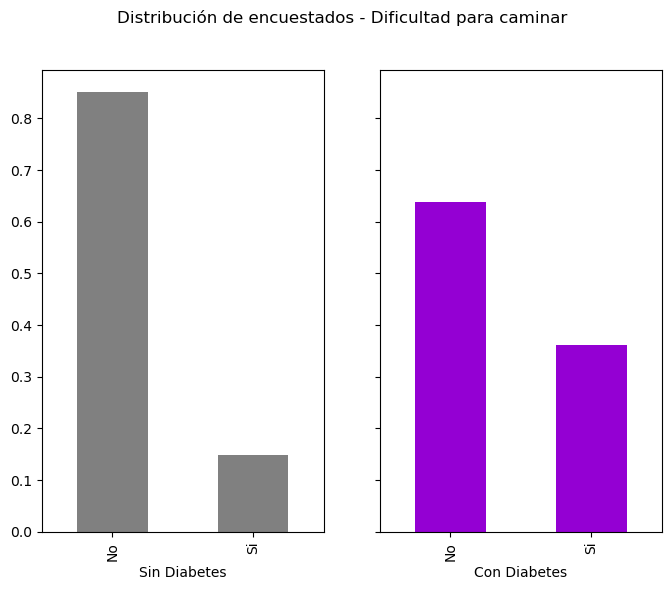

In [93]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Dificultad para caminar')
(data[data['Diabetes']==0]['dificultad_caminar']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['dificultad_caminar']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 36% de los encuestados con diabetes tienen dificultad para caminar, contra un 14% de quienes no tienen diabetes.

**Consumo de frutas**

In [219]:
(data[data['Diabetes']==0]['consume_fruta']
 .value_counts(1)
 .sort_index())

0    0.381474
1    0.618526
Name: consume_fruta, dtype: float64

In [220]:
(data[data['Diabetes']==1]['consume_fruta']
 .value_counts(1)
 .sort_index())

0    0.413633
1    0.586367
Name: consume_fruta, dtype: float64

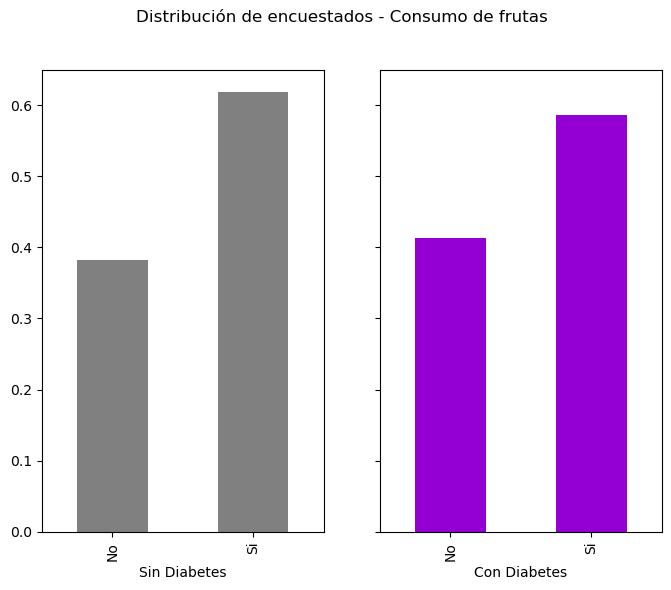

In [94]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Consumo de frutas')
(data[data['Diabetes']==0]['consume_fruta']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['consume_fruta']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que el numero es muy similar, un 59% de los encuestados con diabetes consumen frutas, y un 62% de los encuestados que no sufren diabetes tambien comen frutas

**Consumo de verduras**

In [222]:
(data[data['Diabetes']==0]['consume_verduras']
 .value_counts(1)
 .sort_index())

0    0.197185
1    0.802815
Name: consume_verduras, dtype: float64

In [225]:
(data[data['Diabetes']==1]['consume_verduras']
 .value_counts(1)
 .sort_index())

0    0.243468
1    0.756532
Name: consume_verduras, dtype: float64

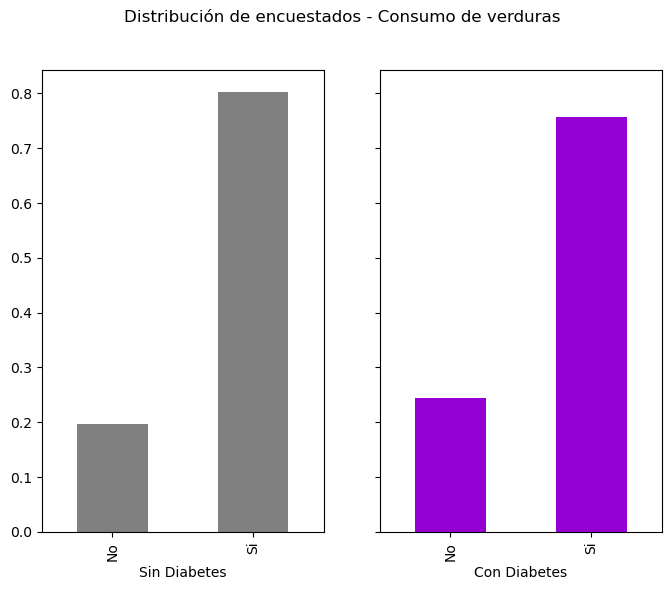

In [95]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Consumo de verduras')
(data[data['Diabetes']==0]['consume_verduras']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['consume_verduras']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Para las verduras, un 5% mas de quienes no tienen diabetes consumen verduras en comparacion con quienes si tienen diabetes. 

**Consumo de alcohol**

In [226]:
(data[data['Diabetes']==0]['consumo_alcohol']
 .value_counts(1)
 .sort_index())

0    0.932072
1    0.067928
Name: consumo_alcohol, dtype: float64

In [227]:
(data[data['Diabetes']==1]['consumo_alcohol']
 .value_counts(1)
 .sort_index())

0    0.973821
1    0.026179
Name: consumo_alcohol, dtype: float64

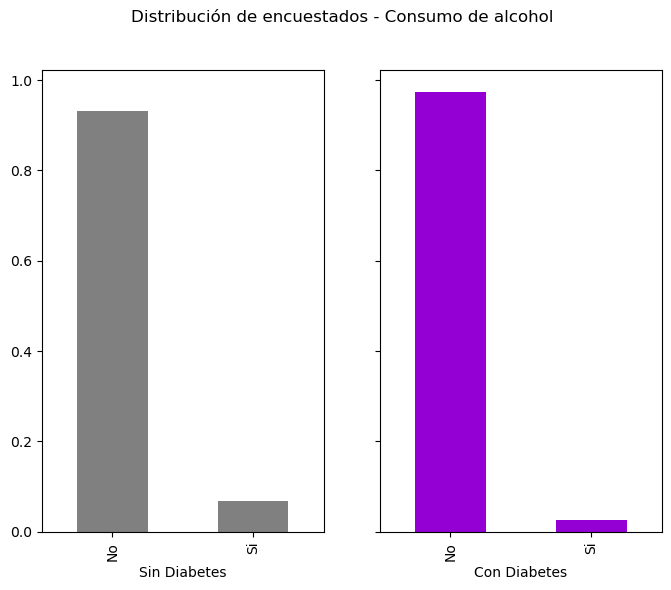

In [97]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Consumo de alcohol')
(data[data['Diabetes']==0]['consumo_alcohol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['consumo_alcohol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 2% de los encuestados con diabetes consumen alcohol, contra un 6% de quienes no tienen diabetes.

**Fumador**

In [73]:
(data[data['Diabetes']==0]['Fumador']
 .value_counts(1)
 .sort_index())

0    0.54489
1    0.45511
Name: Fumador, dtype: float64

In [74]:
(data[data['Diabetes']==1]['Fumador']
 .value_counts(1)
 .sort_index())

0    0.483864
1    0.516136
Name: Fumador, dtype: float64

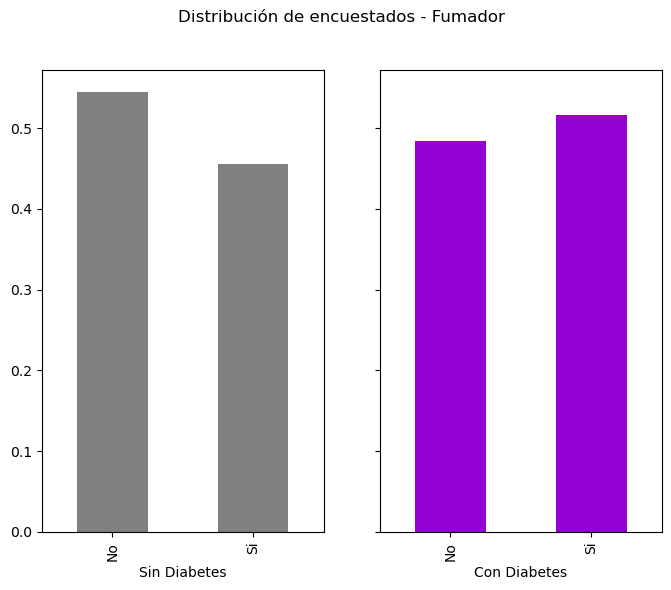

In [83]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Fumador')
(data[data['Diabetes']==0]['Fumador']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['Fumador']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 51% de los encuestados con diabetes son fumadores, contra un 45% de quienes no tienen diabetes.

**Costo salud**

In [41]:
(data[data['Diabetes']==0]['costo_salud']
 .value_counts(1)
 .sort_index())

0    0.910631
1    0.089369
Name: costo_salud, dtype: float64

In [42]:
(data[data['Diabetes']==1]['costo_salud']
 .value_counts(1)
 .sort_index())

0    0.890726
1    0.109274
Name: costo_salud, dtype: float64

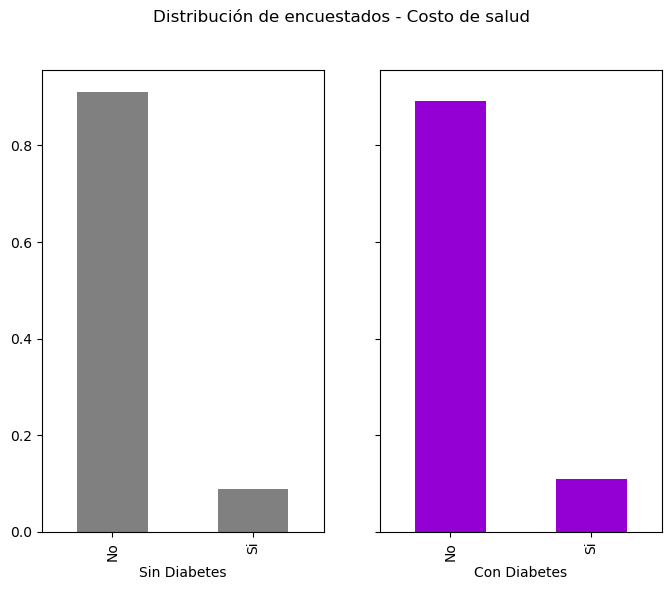

In [43]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Costo de salud')
(data[data['Diabetes']==0]['costo_salud']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['costo_salud']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 11% de los encuestados con diabetes en los últimos 12 meses necesitaron ver a un médico pero no pudieron debido al costo, contra un 8% de quienes no tienen diabetes.

**Control colesterol**

In [44]:
(data[data['Diabetes']==0]['control_colesterol']
 .value_counts(1)
 .sort_index())

0    0.047328
1    0.952672
Name: control_colesterol, dtype: float64

In [45]:
(data[data['Diabetes']==1]['control_colesterol']
 .value_counts(1)
 .sort_index())

0    0.007627
1    0.992373
Name: control_colesterol, dtype: float64

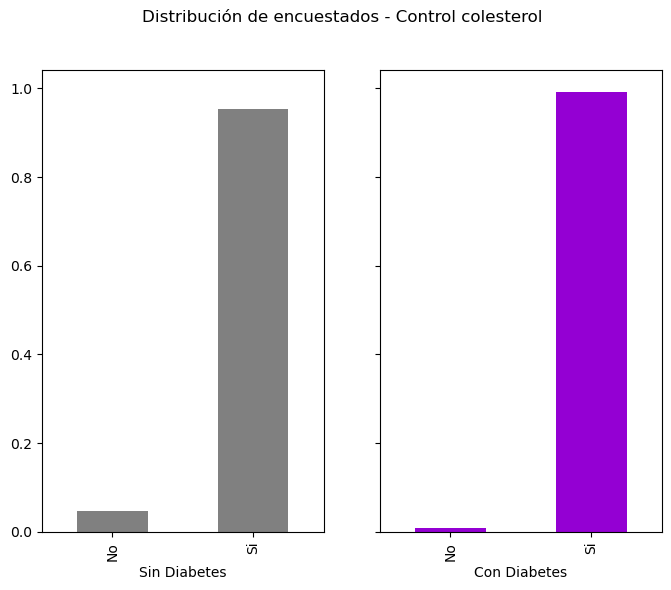

In [46]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribución de encuestados - Control colesterol')
(data[data['Diabetes']==0]['control_colesterol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('Sin Diabetes',size=10)
ax.set_xticklabels(["No", 'Si'])

(data[data['Diabetes']==1]['control_colesterol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('Con Diabetes',size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

Observamos que un 99% de los encuestados con diabetes realizaron un control de colesterol en los últimos cinco años, contra un 95% de quienes no tienen diabetes.

**Ingresos**

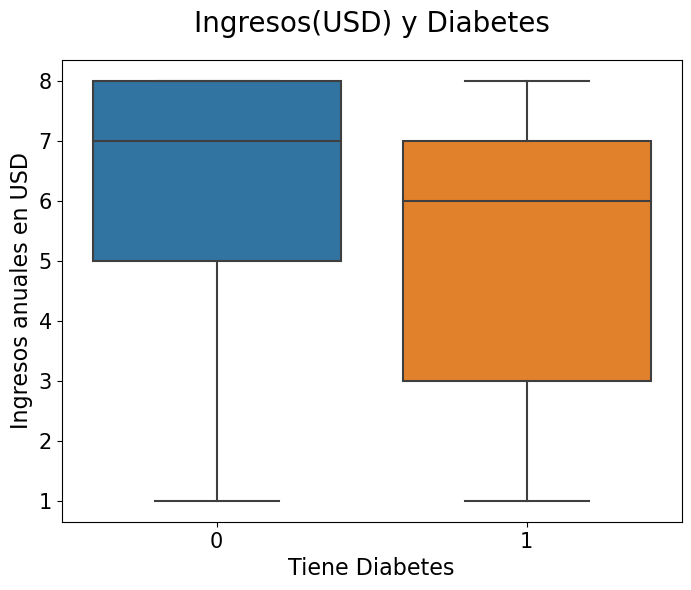

In [139]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="Diabetes", y="Ingresos" ,data=data)
bp.axes.set_title("Ingresos(USD) y Diabetes",fontsize=20, pad=20)
bp.set_xlabel("Tiene Diabetes",fontsize=16)
bp.set_ylabel("Ingresos anuales en USD",fontsize=16)
bp.tick_params(labelsize=15)

Text(0.5, 1.0, 'Distribucion de ingresos de encuestados con Diabetes')

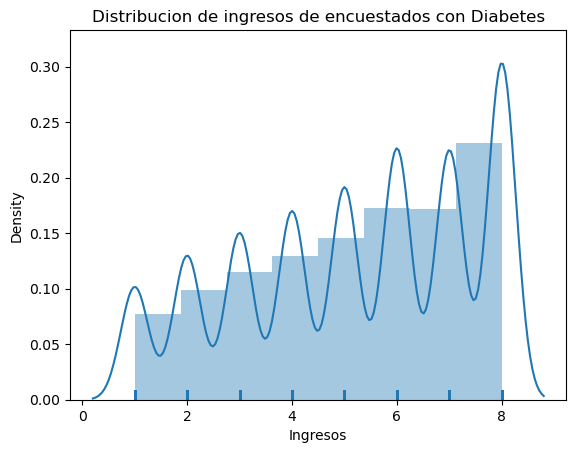

In [229]:
sns.distplot(data[data['Diabetes']==1]['Ingresos'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Distribucion de ingresos de encuestados con Diabetes")

Text(0.5, 1.0, 'Distribucion de ingresos de encuestados sin Diabetes')

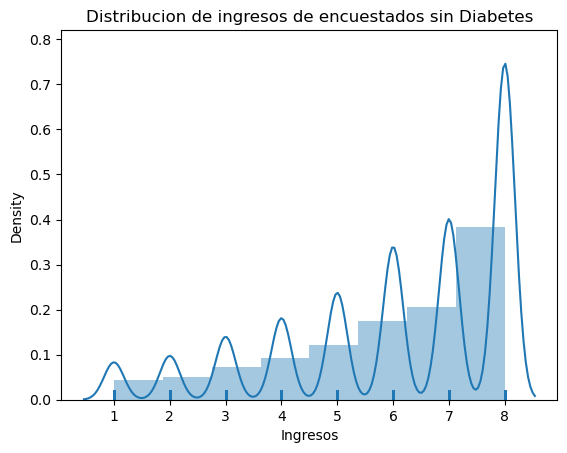

In [230]:
sns.distplot(data[data['Diabetes']==0]['Ingresos'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Distribucion de ingresos de encuestados sin Diabetes")

La mediana de quienes tienen diabetes es menor a la mediana de ingresos de quienes no tienen diabetes. 
La mayoría de los encuestados tienen altos niveles de ingresos. 
En los rangos mas bajos de ingresos tenemos mayor cantidad de encuestados con diabetes. 

**Educacion**

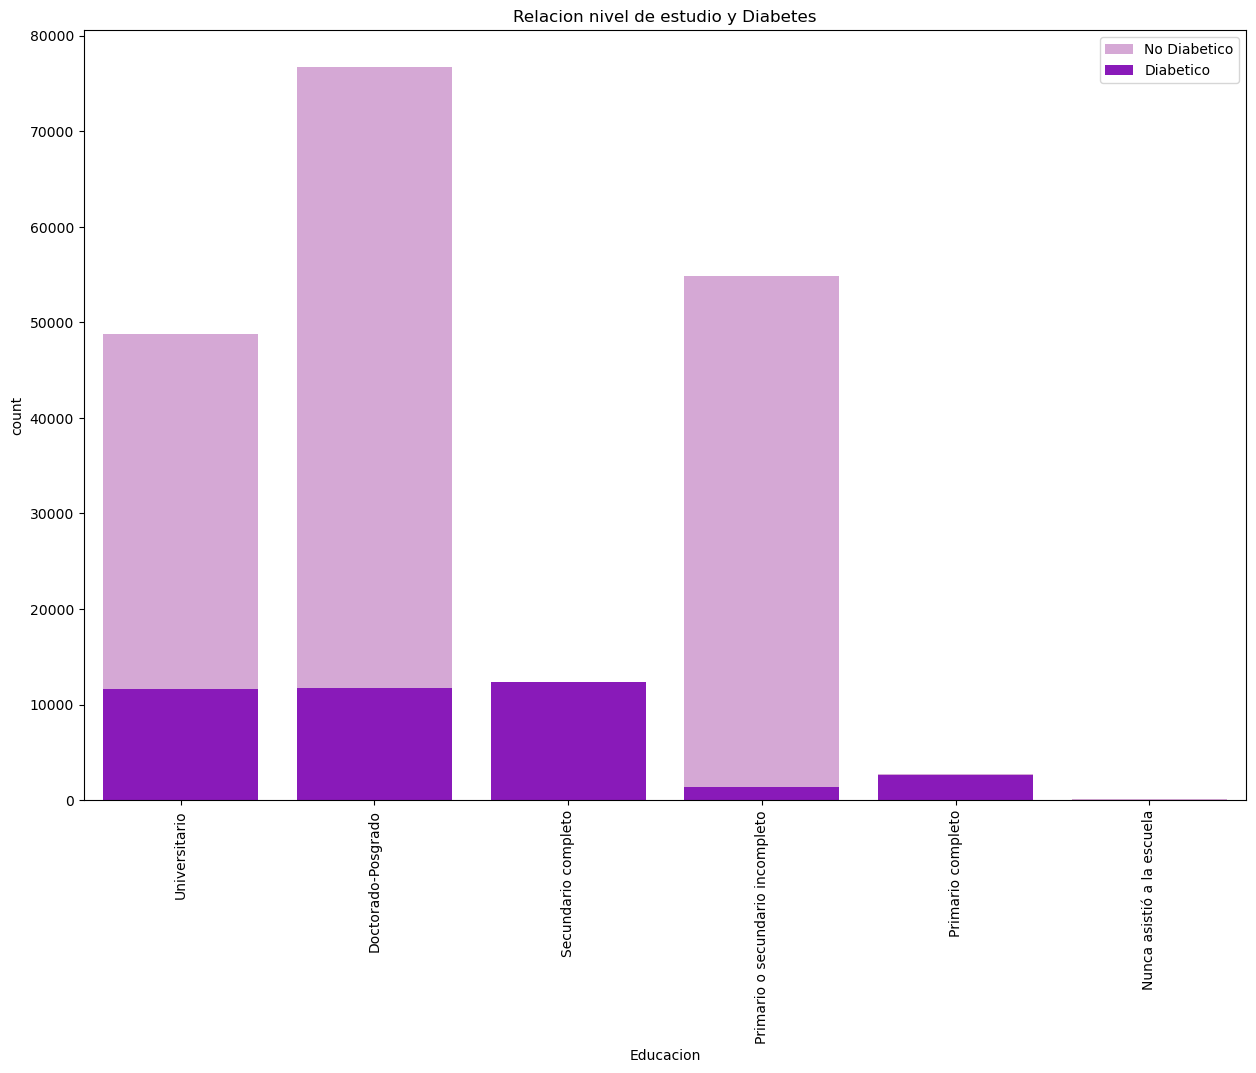

In [99]:
plt.figure(figsize=(15, 10))

plt_1 = sns.countplot(data1.Educacion[data1.Diabetes == 0], color = 'plum' ,label="No Diabetico")
sns.countplot(data1.Educacion[data1.Diabetes == 1], color = 'darkviolet',label="Diabetico")
plt.title("Relacion nivel de estudio y Diabetes")

plt.legend()

for item in plt_1.get_xticklabels():
    item.set_rotation(90)

Podemos visualizar que a medida que aumenta el nivel de estudio alcanzado por los encuestados, descrubrimos que un mayor número
de estos últimos sufren de diabetes, sin embargo, la mayor cantidad de nuestros encuestados lograron un nivel educativo alto, por lo que el nivel educativo del encuestado no es realmente determinante para no tener diabetes.

**Sexo**

In [31]:
data1.groupby(['Sexo','Diabetes'])['Diabetes'].agg(Count='count')

Count
Sexo   Diabetes        
Hombre 0          82150
       1          18777
Mujer  0         107905
       1          20949

In [53]:
20949/(107905 + 20949) # mujeres

0.16257935337668988

In [54]:
18777/(82150+18777) # hombres 

0.18604535951727486

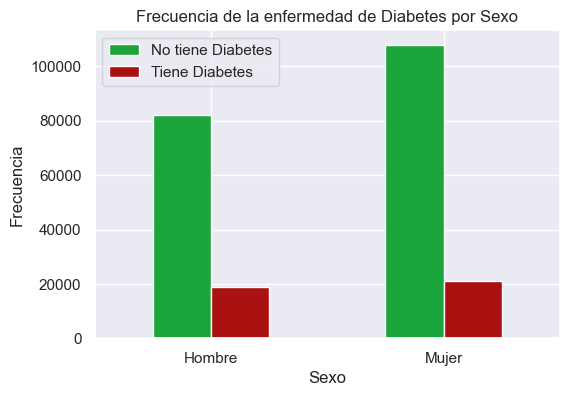

In [197]:
pd.crosstab(data1.Sexo,data1.Diabetes).plot(kind="bar",figsize=(6,4),color=['#1CA53B','#AA1111' ])
plt.title('Frecuencia de la enfermedad de Diabetes por Sexo')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(["No tiene Diabetes","Tiene Diabetes"])
plt.ylabel('Frecuencia')
plt.show()

Del grafico podemos observar que hay mas mujeres que hombres con diabetes, sin embargo, hay mas muejeres que hombres en el estudio.Tomando la cantidad de hombres con diabetes sobre la cantidad total de hombres encuestados, el porcentaje es de un 19%; el cual es mayor al porcentaje de mujeres con diabetes sobre el total de mujeres encuestadas que es un 16%.

**IMC**

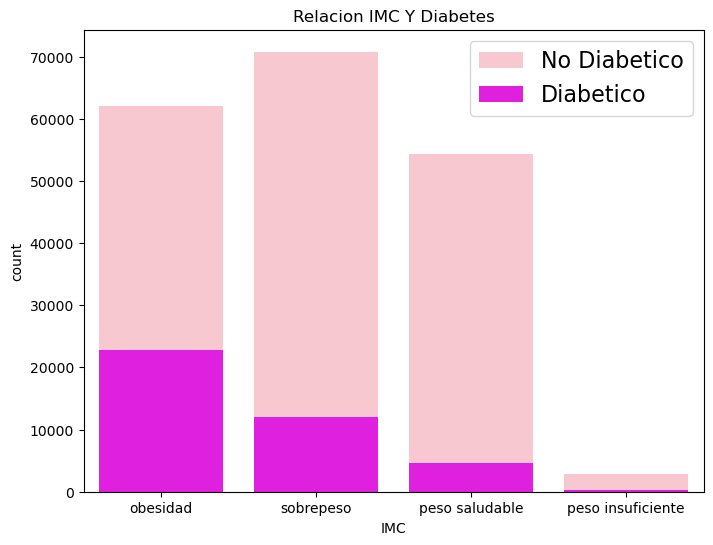

In [49]:
plt.figure(figsize=(8, 6))

sns.countplot(data1.IMC[data1.Diabetes == 0], color="pink", label="No Diabetico")
sns.countplot(data1.IMC[data1.Diabetes == 1], color="magenta", label="Diabetico")
plt.title("Relacion IMC Y Diabetes")


plt.legend( fontsize=16)

Las personas con un IMC entre 25.0 y 30, se encuentran dentro del rango de sobrepeso; y las personas con un IMC mayor a 30.0 se encuentran dentro del rango de obesidad; vemos que en los encuestados con estas caracteristicas hay mayor cantidad que tienen la enfermedad de diabetes. 

**Ratio de Salud**

<AxesSubplot:xlabel='ratio_salud', ylabel='Count'>

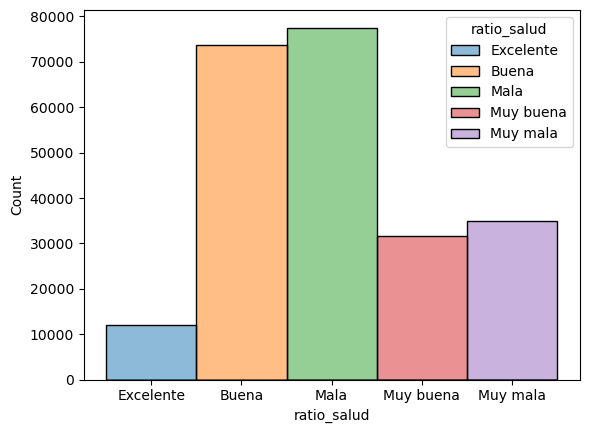

In [57]:
sns.histplot(data=data1, x="ratio_salud", hue="ratio_salud")

**Días salud fisica**

Text(0.5, 1.0, 'Histograma días de salud fisica')

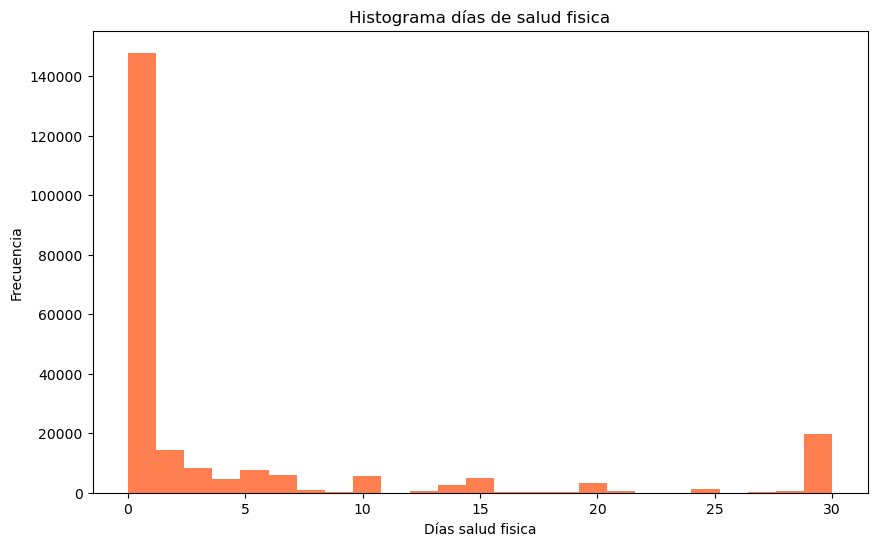

In [58]:

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.dias_saludfisica, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('Días salud fisica')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma días de salud fisica')

**Días salud mental**

Text(0.5, 1.0, 'Histograma días de salud mental')

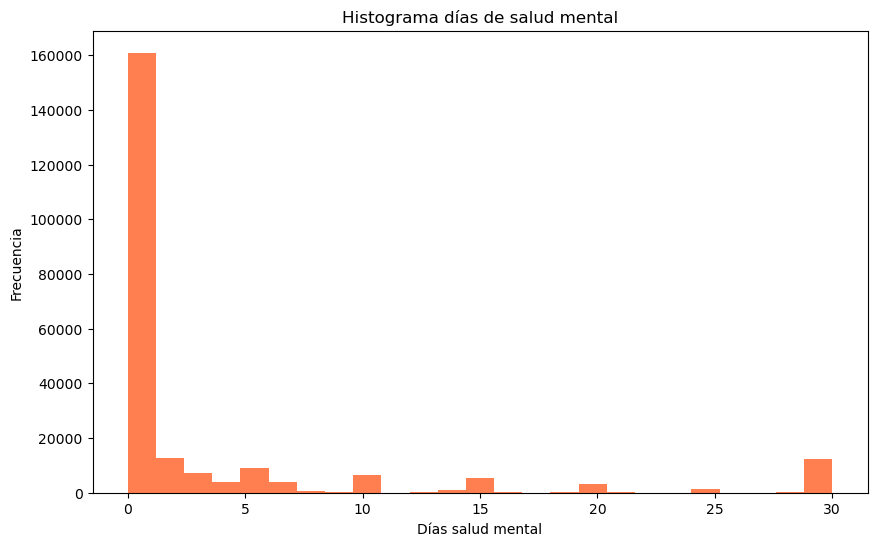

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.dias_saludmental, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('Días salud mental')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma días de salud mental')

Observando el histograma de días de salud mental y fisica, mas de cien mil encuestados respondieron que en los últimos 30 días, como máximo, un día estuvieron enfermos o con lesiones, o deprimidos o con estrés.
Podemos concluir que hay una relacion entre la salud fisica y mental, teniendo en cuenta que una afecta/influye sobre la otra. 

## Selección del algoritmo: 


¿Qué queremos conseguir con el modelo? clasificar datos en dos clases: Diabetico y no diabetico


¿Con qué datos contamos para resolver el problema? Datos etiquetados


Conclusión:  algoritmo de aprendizaje supervisado, clasificación 

En las evaluaciones de nuestros modelos prestaremos especial atencion a la sensibilidad(recall), ya que, en el área de la salud decimos que la sensibilidad(recall) es la capacidad de poder detectar correctamente la enfermedad entre los enfermos.Son casos en los que perder un caso positivo tiene un costo mucho mayor que clasificar erróneamente un caso como positivo.
Por otro lado prestaremos tambien atencion a los falsos negativos, error de tipo II, ya que, para este caso, significa clasificar a un paciente con diabetes como si no tendria la enfermedad. 

Nuestro objetivo es obtener una recall minima del 75% 

## Separo variables de target

In [321]:
X = data.drop('Diabetes', 1)  

In [322]:
y = data['Diabetes']   

## Feature Selection

In [164]:
from sklearn.feature_selection import SelectKBest

In [165]:
selector = SelectKBest(k=16)

In [166]:
selector.fit(X,y)

SelectKBest(k=16)

Text(0.5, 1.0, 'Importancia de cada feature')

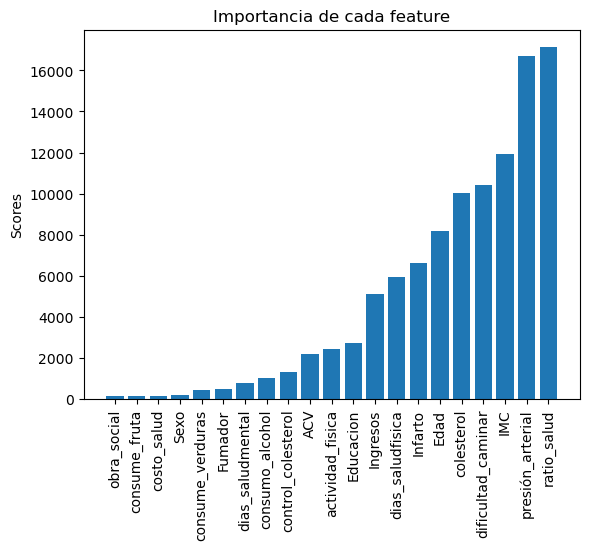

In [167]:
scores = selector.scores_

sorted_indices = np.argsort(scores)

plt.bar(np.arange(len(X.columns)), scores[sorted_indices])
plt.xticks(np.arange(len(X.columns)), X.columns[sorted_indices], rotation=90)
plt.ylabel('Scores')
plt.title('Importancia de cada feature')

In [168]:
mask = selector.get_support()

selected_features = X.columns[mask]

print("Varibles Seleccionadas:", selected_features)

Varibles Seleccionadas: Index(['presión_arterial', 'colesterol', 'control_colesterol', 'IMC',
       'Fumador', 'ACV', 'Infarto', 'actividad_fisica', 'consumo_alcohol',
       'ratio_salud', 'dias_saludmental', 'dias_saludfisica',
       'dificultad_caminar', 'Edad', 'Educacion', 'Ingresos'],
      dtype='object')


Las variables seleccionadas son coherentes con el Analisis exploratorio de datos 

## Elimino atributos segun seleccion

In [323]:
cols_to_drop = data[['consume_fruta','consume_verduras', 'obra_social',
      'costo_salud', 'Sexo']]

In [324]:
X1 = X.drop(cols_to_drop, axis=1) 

In [325]:
X1.columns

Index(['presión_arterial', 'colesterol', 'control_colesterol', 'IMC',
       'Fumador', 'ACV', 'Infarto', 'actividad_fisica', 'consumo_alcohol',
       'ratio_salud', 'dias_saludmental', 'dias_saludfisica',
       'dificultad_caminar', 'Edad', 'Educacion', 'Ingresos'],
      dtype='object')

## Balanceo de clases

In [326]:
X1.shape

(229781, 16)

In [327]:
y.shape

(229781,)

In [328]:
y.value_counts()

0    190055
1     39726
Name: Diabetes, dtype: int64

El conjunto de datos está desequilibrado, necesitamos equilibrarlo para obtener un mejor modelo, ya que predecir que un encuestado no es diabético tiene más posibilidades que predecir que es diabético. 

Vamos a  equilibrarlos descartando la clase mayoritaria antes de aplicar un algoritmo de ML.
Utilizamos Near-Miss de la libreria 'imblearn'

In [329]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1)

X_sm,y_sm = nm.fit_resample(X1,y)


<AxesSubplot:title={'center':'Distribución de etiquetas después del submuestreo'}>

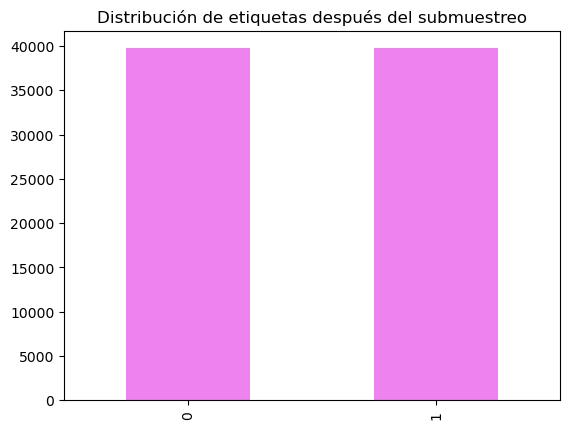

In [330]:
#Pintamos la nueva distribución 
y_sm.value_counts().plot(kind='bar', title='Distribución de etiquetas después del submuestreo', color = 'violet')

## División de conjuntos de datos en train y test

In [331]:
X_train , X_test , y_train , y_test = train_test_split(X_sm,y_sm, test_size=0.2 , random_state=42)

In [332]:
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))

Ejemplos usados para entrenar:  63561
Ejemplos usados para test:  15891


## Data Scalling 

La estandarización de un conjunto de datos implica volver a escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1.

Escalar las características es de suma importancia porque las diferentes características están en diferentes escalas.

In [333]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building

Entrenaremos 4 algoritmos que utilizan Métodos de Ensamble
- LightGBM
- Random Forest
- XgBoost
- Gradient Boosting 

**HyperParameter Tuning**

## LGBMClassifier

Un enfoque para equilibrar la precisión de GridSearchCV con la velocidad de RandomizedSearchCV es usar una combinación de ambos métodos.

Podemos comenzar usando RandomizedSearchCV para muestrear una gran cantidad de hiperparámetros de las distribuciones especificadas. Esto puede ayudarnos a explorar rápidamente el espacio de búsqueda e identificar las regiones que son más prometedoras. Una vez que identificamos una región prometedora, usamos GridSearchCV para realizar una búsqueda más específica en esa región, utilizando un rango más pequeño de valores de hiperparámetros.

Al combinar los dos métodos, aprovechamos la velocidad de RandomizedSearchCV para explorar rápidamente el espacio de búsqueda, al mismo tiempo que contamos con  la precisión de GridSearchCV para realizar una búsqueda más enfocada en regiones prometedoras.

In [440]:
# Aplico tuning de hyperparametros del modelo
LG = lgb.LGBMClassifier(random_state = 42)

param_dist_LG = {
    'num_leaves': sp_randint(6, 50),
    'max_depth': sp_randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Defino Randomized search
LG_RS = RandomizedSearchCV(
       estimator  = LG,
       param_distributions = param_dist_LG,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1,
       n_iter=50
       )



In [442]:
# Entrenar
lg_RS_result = LG_RS.fit(X_train, y_train)

# Sumarizo resultados
print("Best: %f using %s" % (lg_RS_result.best_score_, lg_RS_result.best_params_))

Best: 0.778786 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 11, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [444]:
# Obtener los mejores hiperparámetros de randomized search
best_params_LG = lg_RS_result.best_params_

In [445]:
best_params_LG 

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'num_leaves': 11,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [449]:
# Defino Grid search
params_LG = {'n_estimators': [best_params_LG['n_estimators'] - 50, best_params_LG['n_estimators'], best_params_LG['n_estimators'] + 50,
                             best_params_LG['n_estimators'] + 25,best_params_LG['n_estimators'] -25],
            'max_depth': [best_params_LG['max_depth'] - 1, best_params_LG['max_depth'], best_params_LG['max_depth'] + 1],
            'num_leaves': [best_params_LG['num_leaves'] - 1, best_params_LG['num_leaves'], best_params_LG['num_leaves'] + 1],
            'reg_alpha': [best_params_LG['reg_alpha'] - 0.1, best_params_LG['reg_alpha'], best_params_LG['reg_alpha'] + 0.1],
            'reg_lambda': [best_params_LG['reg_lambda'] - 0.1, best_params_LG['reg_lambda'], best_params_LG['reg_lambda'] + 0.1],
            'learning_rate': [best_params_LG['learning_rate'] - 0.1, best_params_LG['learning_rate'], best_params_LG['learning_rate'] + 0.1]
            
            }

LG_GS = GridSearchCV(    
       estimator  = LG,
       param_grid = params_LG,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
       )

In [450]:
# Entrenar
LG_GS_result = LG_GS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (LG_GS_result.best_score_, LG_GS_result.best_params_))

Best: 0.780394 using {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 11, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [451]:
#Aplicamos los parametros obtenidos 
LG1 = lgb.LGBMClassifier( n_jobs  = -1, random_state = 42, learning_rate =  0.1,
 max_depth= 6,
 n_estimators= 300,
 num_leaves = 11,
 reg_alpha= 0,
 reg_lambda= 0.5 )

# Entrenar
LG1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est2 = LG1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est5 = LG1.predict(X_train) 

In [452]:
# Obtener las metricas
accuracy_LG_test = accuracy_score(y_test,y_est2)
recall_LG_test = recall_score(y_test, y_est2)
precision_LG_test= precision_score(y_test, y_est2)
f1_LG_test = f1_score(y_test, y_est2)
Roc_auc_test_LG = roc_auc_score(y_test, y_est2)

MSE_LG_train = mean_squared_error(y_train, y_est5)
accuracy_LG_train = accuracy_score(y_train,y_est5)
recall_LG_train = recall_score(y_train, y_est5)
precision_LG_train =  precision_score(y_train, y_est5)
f1_LG_train = f1_score(y_train, y_est5)
Roc_auc_train_LG =  roc_auc_score(y_train, y_est5)

In [453]:
# Imprimimos las metricas
vals1 = data=["Modelo 1: LGBMClassifier", accuracy_LG_train,accuracy_LG_test, precision_LG_train,precision_LG_test,
              recall_LG_train,recall_LG_test,f1_LG_train,f1_LG_test, Roc_auc_train_LG , Roc_auc_test_LG ] 
cols1 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_LG = pd.DataFrame([vals1], columns=cols1)

In [454]:
round(df_metrics_LG,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 1: LGBMClassifier,0.855,0.849,0.915,0.914,0.783,0.772,0.843,0.837,0.855,0.849


Matriz de confusion LGBMClassifier


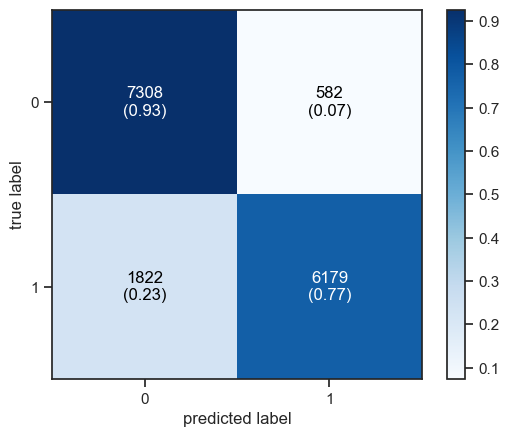

In [455]:
print('Matriz de confusion LGBMClassifier')

cm1 = confusion_matrix(y_test,y_est2)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 93% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 7% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

In [460]:
def plot_roc_curve(fpr, tpr, roc_auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

AUC:  0.849257103318359


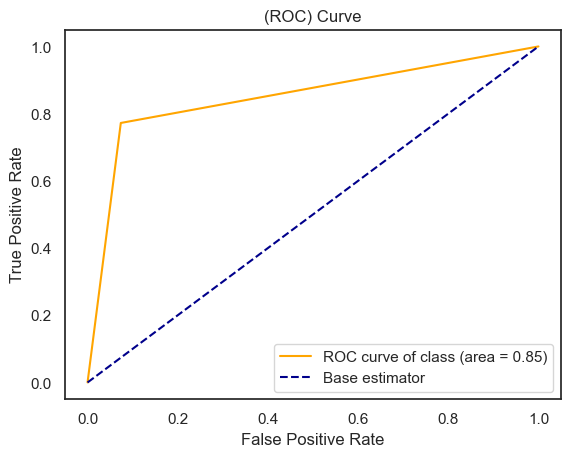

In [456]:
fpr, tpr, thresholds = roc_curve(y_test, y_est2)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

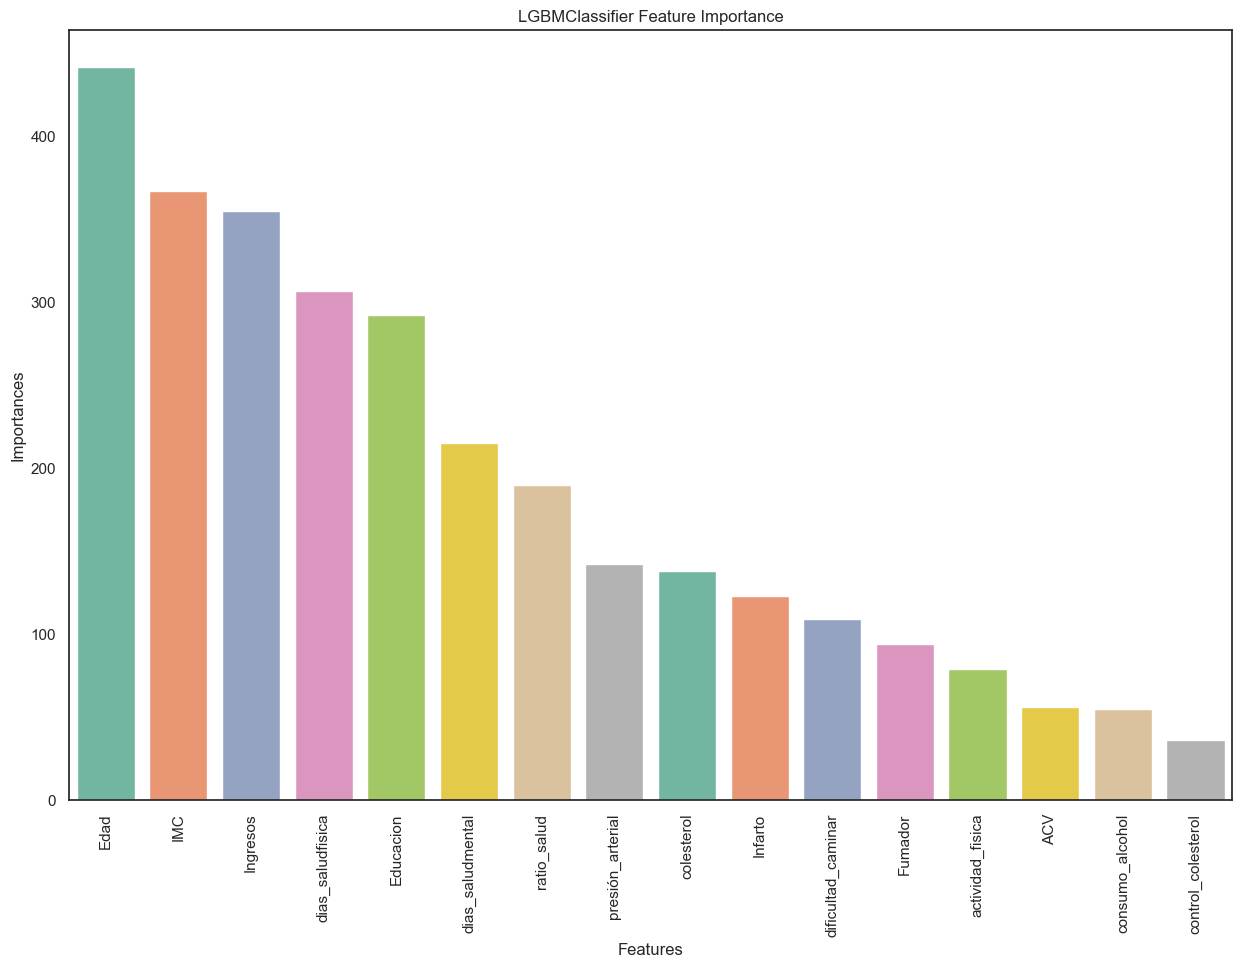

In [457]:
importances_LG = LG1.feature_importances_
columns = X1.columns
df_LG = pd.DataFrame({'Features': columns, 'Importances': importances_LG})
df_LG = df_LG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_LG, palette='Set2')
plt.title('LGBMClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [463]:
joblib.dump(LG1, 'diabetes_LG_model.joblib')

['diabetes_LG_model.joblib']

## Random Forest Classifier

In [417]:
# Aplico tuning de hyperparametros del modelo
RF = RandomForestClassifier(random_state = 42)

# Defino Randomized search
param_distributions_RF = { 
    
    'n_estimators' :[50, 75, 100, 125, 150,200,250], 
    'max_features': [ 'sqrt', 'log2'], 
    'max_depth' : [1,2,3,4,5,None],
    'criterion' :['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.02,0.03],
    'min_samples_split':[2,3,4,5,6,7]
    
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_RS = RandomizedSearchCV(
       estimator  = RF,
       param_distributions = param_distributions_RF,
       scoring    = 'recall', 
       cv         = cv, 
       return_train_score = True,
       n_jobs  = -1,
       n_iter=50
       )


In [418]:
# Entrenar
RF_RS_result = RF_RS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (RF_RS_result.best_score_, RF_RS_result.best_params_))

Best: 0.722910 using {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.01}


In [419]:
# Obtener los mejores hiperparámetros de randomized search
best_params_RF = RF_RS_result.best_params_

In [420]:
best_params_RF

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'ccp_alpha': 0.01}

In [421]:
# Defino Grid search
params_RF = {'n_estimators': [best_params_RF['n_estimators'] - 50, best_params_RF['n_estimators'], best_params_RF['n_estimators'] + 50,
                             best_params_RF['n_estimators'] + 25,best_params_RF['n_estimators'] -25],
            'min_samples_split': [best_params_RF['min_samples_split'] - 1, best_params_RF['min_samples_split'], best_params_RF['min_samples_split'] + 1],
            'ccp_alpha': [best_params_RF['ccp_alpha'] - 0.1, best_params_RF['ccp_alpha'], best_params_RF['ccp_alpha'] + 0.1]
            
            }

RF_GS = GridSearchCV(    
       estimator  = RF,
       param_grid = params_RF,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
       )

In [422]:
# Entrenar
RF_GS_result = RF_GS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (RF_GS_result.best_score_, RF_GS_result.best_params_))

Best: 0.722301 using {'ccp_alpha': 0.01, 'min_samples_split': 3, 'n_estimators': 150}


In [423]:
#Aplicamos los parametros obtenidos 
RF1 = RandomForestClassifier( n_jobs  = -1, random_state = 42,  n_estimators = 150, min_samples_split = 3 ,
                             max_features =  'log2',max_depth =  None, criterion = 'gini', ccp_alpha = 0.01)

# Entrenar
RF1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est4 = RF1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est6 = RF1.predict(X_train) 

In [424]:
# Obtener las metricas
accuracy_RF_test = accuracy_score(y_test,y_est4)
recall_RF_test = recall_score(y_test, y_est4)
precision_RF_test= precision_score(y_test, y_est4)
f1_RF_test = f1_score(y_test, y_est4)
Roc_auc_test_RF = roc_auc_score(y_test, y_est4)

MSE_RF_train = mean_squared_error(y_train, y_est6)
accuracy_RF_train = accuracy_score(y_train,y_est6)
recall_RF_train = recall_score(y_train, y_est6)
precision_RF_train =  precision_score(y_train, y_est6)
f1_RF_train = f1_score(y_train, y_est6)
Roc_auc_train_RF =  roc_auc_score(y_train, y_est6)

In [425]:
# Imprimimos las metricas
vals2 = data=["Modelo 2: Random Forest ", accuracy_RF_train,accuracy_RF_test, precision_RF_train,precision_RF_test,
              recall_RF_train,recall_RF_test,f1_RF_train,f1_RF_test, Roc_auc_train_RF , Roc_auc_test_RF ] 
cols2 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_RF = pd.DataFrame([vals2], columns=cols2)

In [426]:
round(df_metrics_RF,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 2: Random Forest,0.812,0.806,0.88,0.88,0.722,0.712,0.793,0.787,0.812,0.807


Matriz de confusion Random Forest


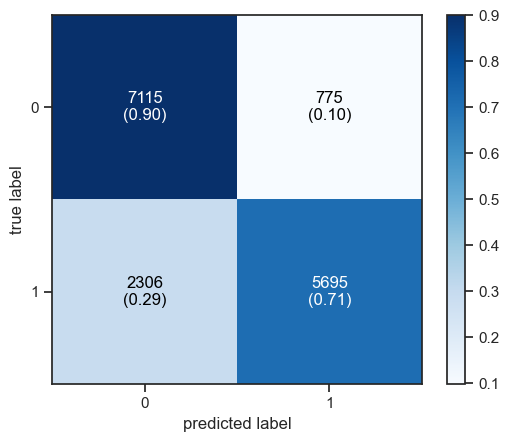

In [458]:
print('Matriz de confusion Random Forest')

cm1 = confusion_matrix(y_test,y_est4)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 90% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 29% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 10% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 71% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8067802123593866


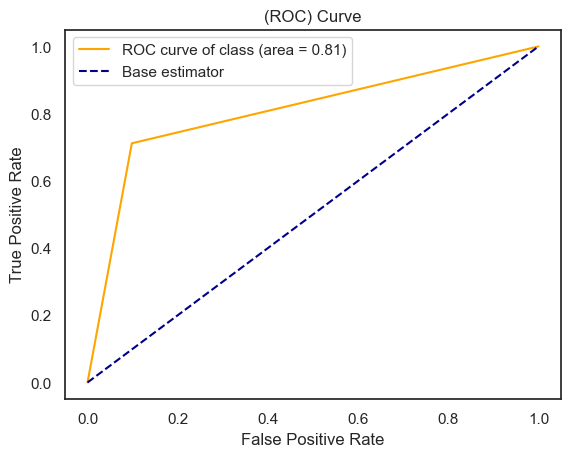

In [459]:
fpr, tpr, thresholds = roc_curve(y_test, y_est4)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

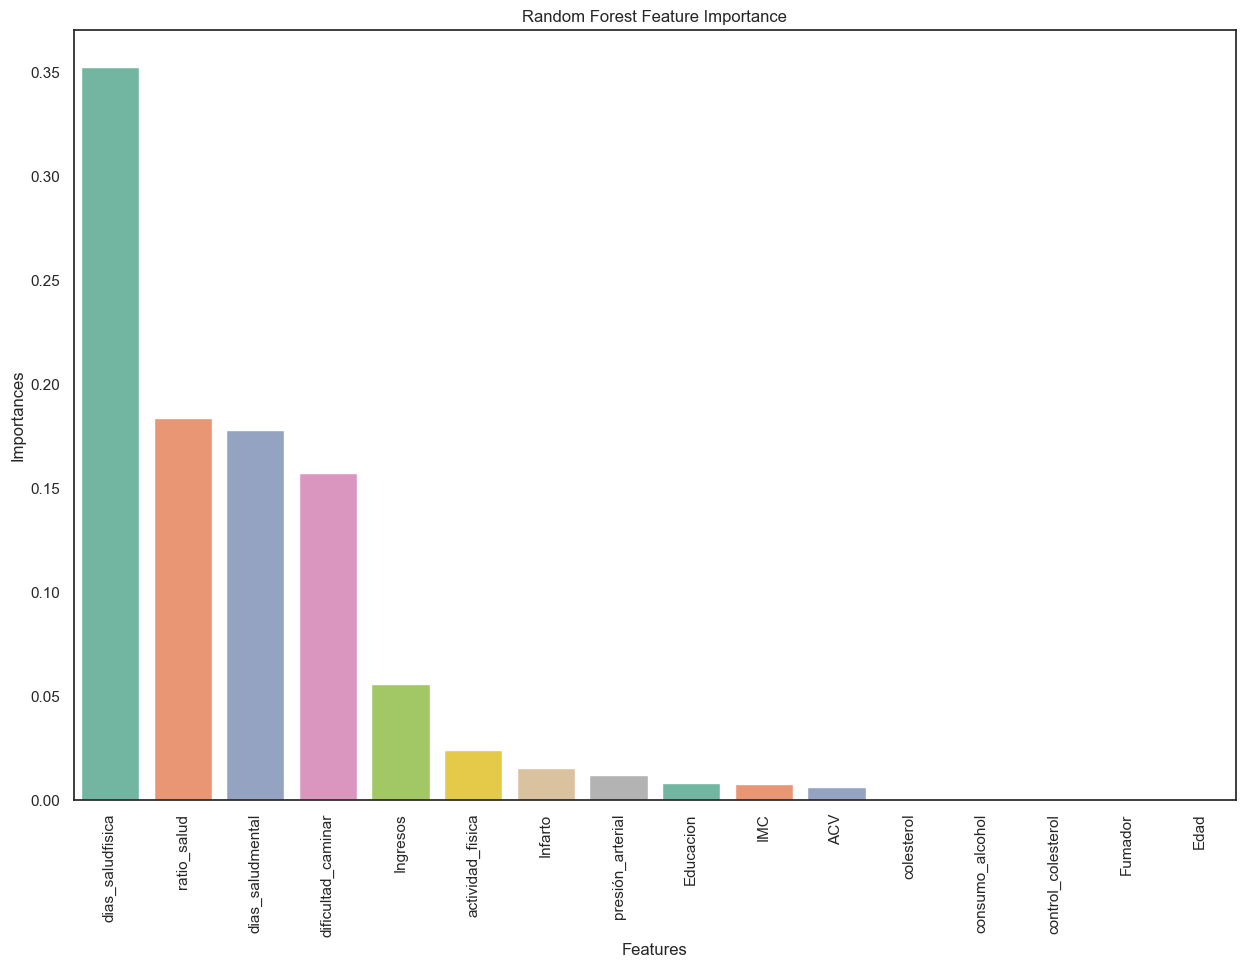

In [461]:
importances_RF = RF1.feature_importances_
columns = X1.columns
df_RF = pd.DataFrame({'Features': columns, 'Importances': importances_RF})
df_RF = df_RF.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_RF, palette='Set2')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [462]:
joblib.dump(RF1, 'diabetes_RF_model.joblib')

['diabetes_RF_model.joblib']

# XGBOOST

**Optimización bayesiana con HYPEROPT**

Utilizaremos la Optimización bayesiana con HYPEROPT para evaluar sus resultados en el algoritmo Xgboost 

Hyperopt es una libreria de Python que se utiliza para ajustar los hiperparámetros del modelo, la cual busca a través de un espacio de valores de hiperparámetros y encuentra los mejores valores posibles que producen el mínimo de la función de pérdida.



In [225]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


In [246]:
#Inicializar espacio de dominio para rango de valores, 
#El espacio de dominio son los valores de entrada sobre los que queremos buscar.
space={ 
        'n_estimators': 180,
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'eta': hp.quniform('eta', 0.05, 1, 0.025),
        'seed': 42
    }

In [249]:
# Definir función objetivo
def objective(space):
    clf=xgb.XGBClassifier(objective = 'binary:logistic', 
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_lambda = space['reg_lambda'],min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=space['colsample_bytree'],eta = space['eta'])
                    
    
    evaluation = [( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print ("SCORE:", recall)
    return {'loss': -recall, 'status': STATUS_OK }

In [250]:
trials = Trials()
best = fmin(fn=objective,space=space, max_evals=100, algo=tpe.suggest,trials = trials)
print(best)


SCORE:                                                 
0.7687789026371703                                     
SCORE:                                                                            
0.7699037620297463                                                                
SCORE:                                                                            
0.7682789651293588                                                                
SCORE:                                                                            
0.7681539807524059                                                                
SCORE:                                                                            
0.7707786526684165                                                                
SCORE:                                                                            
0.7709036370453693                                                                
SCORE:                                                    

In [256]:
#ENTRENAMIENTO CON LOS MEJORES HIPERPARAMETROS
model_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', eval_metric =  'auc', 
                    n_estimators = 180, max_depth = 3, gamma = 7,
                    reg_lambda = 0.16,min_child_weight=1 ,
                    colsample_bytree = 0.6,eta = 1)
              
# Entrenar
model_xgb.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est8 = model_xgb.predict(X_test)

# Obtener las predicciones para el conjunto de datos de train
y_est9 = model_xgb.predict(X_train) 

In [257]:
# Obtener las metricas
accuracy_XG1_test = accuracy_score(y_test,y_est8)
recall_XG1_test = recall_score(y_test, y_est8)
precision_XG1_test= precision_score(y_test, y_est8)
f1_XG1_test = f1_score(y_test, y_est8)
Roc_auc_test_XG1 = roc_auc_score(y_test, y_est8)      

MSE_XG1_train = mean_squared_error(y_train, y_est9)
accuracy_XG1_train = accuracy_score(y_train,y_est9)
recall_XG1_train = recall_score(y_train, y_est9)
precision_XG1_train =  precision_score(y_train, y_est9)
f1_XG1_train = f1_score(y_train, y_est9)
Roc_auc_train_XG1 =  roc_auc_score(y_train, y_est9)

In [258]:
# Imprimimos las metricas
vals4 = data=["Modelo 3: XGBOOST - HYPEROPT ", accuracy_XG1_train,accuracy_XG1_test, precision_XG1_train,precision_XG1_test,
              recall_XG1_train,recall_XG1_test,f1_XG1_train,f1_XG1_test, Roc_auc_train_XG1 , Roc_auc_test_XG1 ] 
cols4 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GB_HYPEROPT = pd.DataFrame([vals4], columns=cols4)

In [259]:
round(df_metrics_GB_HYPEROPT,3)  

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 3: XGBOOST,0.852,0.845,0.908,0.906,0.782,0.772,0.84,0.834,0.852,0.845


Matriz de confusion  XGBOOST - HYPEROPT 


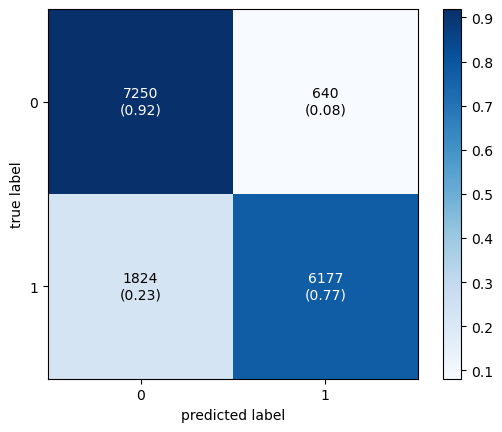

In [263]:
print('Matriz de confusion  XGBOOST - HYPEROPT ')

cm1 = confusion_matrix(y_test,y_est8)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 8% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8454565802848788


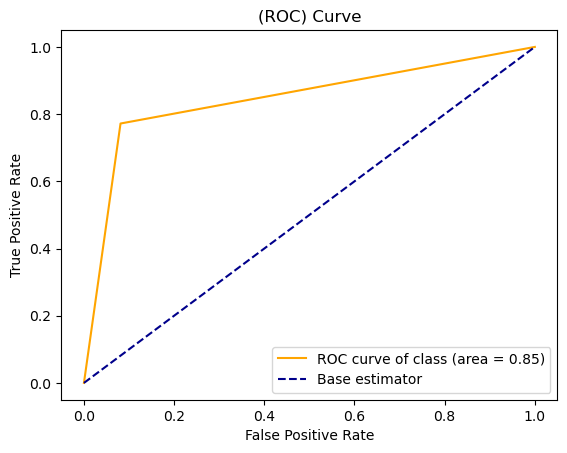

In [264]:
fpr, tpr, thresholds = roc_curve(y_test,y_est8 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

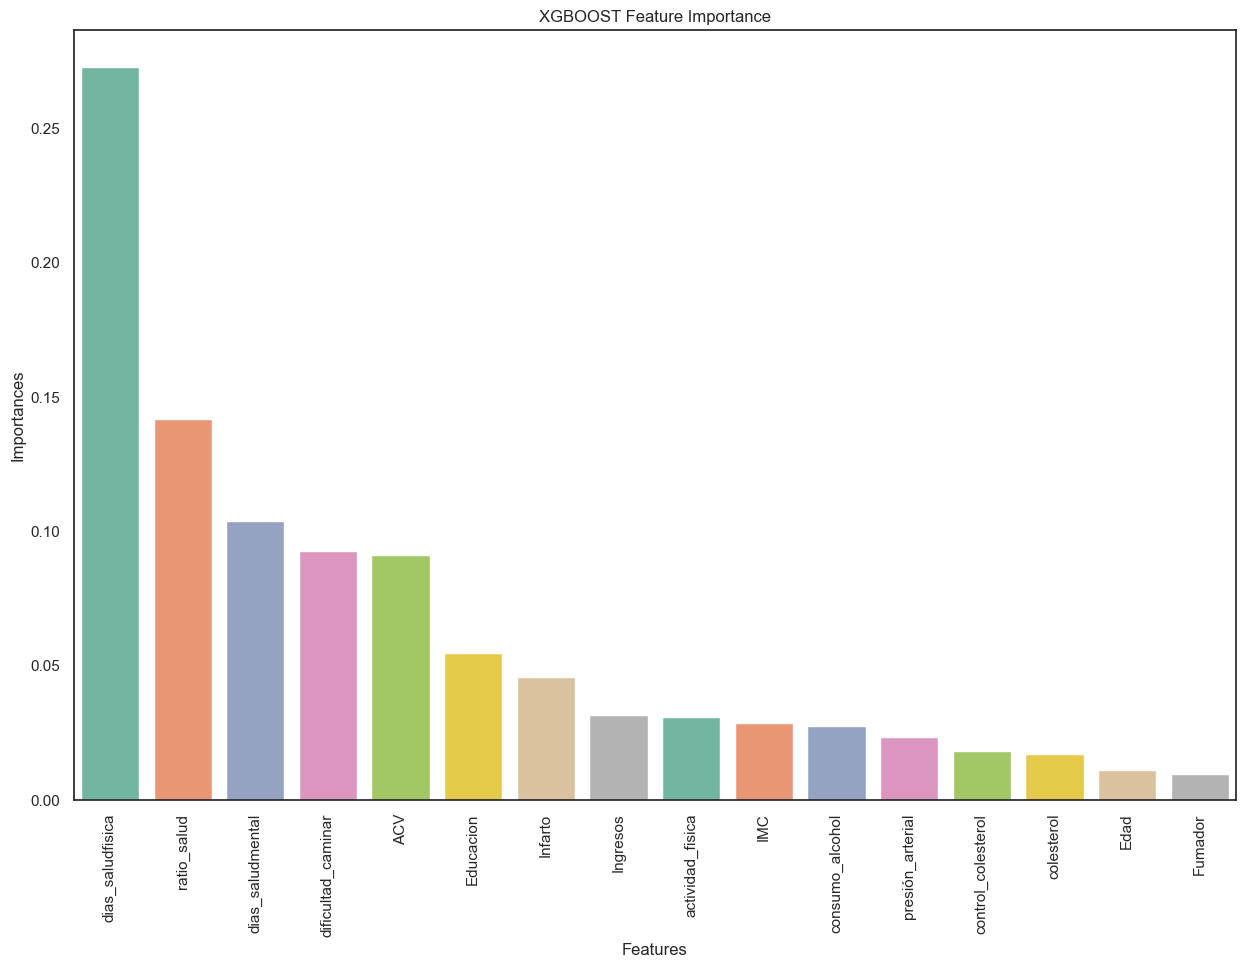

In [465]:
importances_XG = model_xgb.feature_importances_
columns = X1.columns
df_XG = pd.DataFrame({'Features': columns, 'Importances': importances_XG})
df_XG = df_XG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_XG, palette='Set2')
plt.title('XGBOOST Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [466]:
joblib.dump(model_xgb, 'diabetes_XG_model.joblib')

['diabetes_XG_model.joblib']

## GradientBoosting

In [343]:
# scikit-optimize (skopt) libreria 
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize
from skopt.utils import use_named_args


gp_minimize es una función poderosa proporcionada por la biblioteca scikit-optimize que nos permite optimizar de manera eficiente los hiperparámetros de los modelos de aprendizaje automático mediante la optimización bayesiana con procesos gaussianos para minimizar una función objetivo. Nos ayuda a encontrar el mejor conjunto de hiperparámetros para nuestro modelo mientras minimiza la cantidad de evaluaciones necesarias, lo que puede ahorrar una cantidad significativa de tiempo y recursos.

In [348]:
gra = GradientBoostingClassifier(random_state = 42)

In [349]:
# lista de hiperparámetros que queremos optimizar
space  = [Integer(1, 5, name='max_depth'),
          Real(0.01, 1.0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    gra.set_params(**params)

    return -np.mean(cross_val_score(gra, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="recall"))

In [350]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=-0.7838'

In [352]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- n_estimators=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=3
- learning_rate=0.285895
- n_estimators=80
- min_samples_split=100
- min_samples_leaf=100


In [387]:
#Aplicamos los parametros obtenidos 
GB1 = GradientBoostingClassifier(random_state = 42, max_depth=3, n_estimators = 80, min_samples_split = 100,
                             min_samples_leaf=100,learning_rate=0.29 )

# Entrenar
GB1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est1 = GB1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est3 = GB1.predict(X_train) 

In [388]:
# Obtener las metricas
accuracy_GB1_test = accuracy_score(y_test,y_est1)
recall_GB1_test = recall_score(y_test, y_est1)
precision_GB1_test= precision_score(y_test, y_est1)
f1_GB1_test = f1_score(y_test, y_est1)
Roc_auc_test_GB1 = roc_auc_score(y_test, y_est1)      

MSE_GB1_train = mean_squared_error(y_train, y_est3)
accuracy_GB1_train = accuracy_score(y_train,y_est3)
recall_GB1_train = recall_score(y_train, y_est3)
precision_GB1_train =  precision_score(y_train, y_est3)
f1_GB1_train = f1_score(y_train, y_est3)
Roc_auc_train_GB1 =  roc_auc_score(y_train, y_est3)

In [389]:
# Imprimimos las metricas
vals5 = data=["Modelo 4: GradientBoosting ", accuracy_GB1_train,accuracy_GB1_test, precision_GB1_train,precision_GB1_test,
              recall_GB1_train,recall_GB1_test,f1_GB1_train,f1_GB1_test, Roc_auc_train_GB1 , Roc_auc_test_GB1 ] 
cols5 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GraB = pd.DataFrame([vals5], columns=cols5)

In [390]:
round(df_metrics_GraB,3)  

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 4: GradientBoosting,0.851,0.844,0.903,0.903,0.785,0.774,0.84,0.834,0.85,0.845


Matriz de confusion GradientBoosting


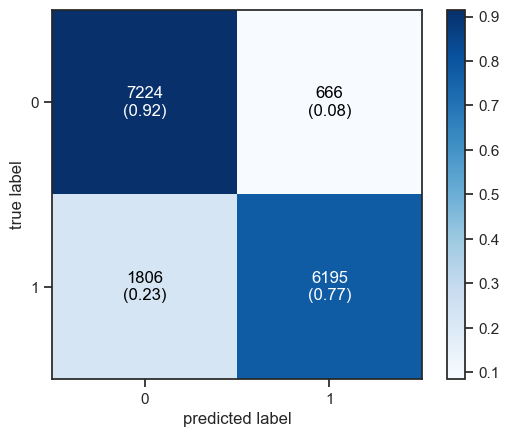

In [467]:
print('Matriz de confusion GradientBoosting')

cm1 = confusion_matrix(y_test,y_est1)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 8% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8449337844176322


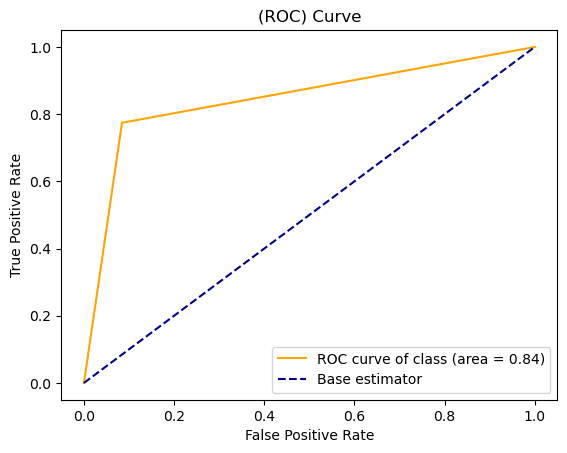

In [392]:
fpr, tpr, thresholds = roc_curve(y_test,y_est1 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

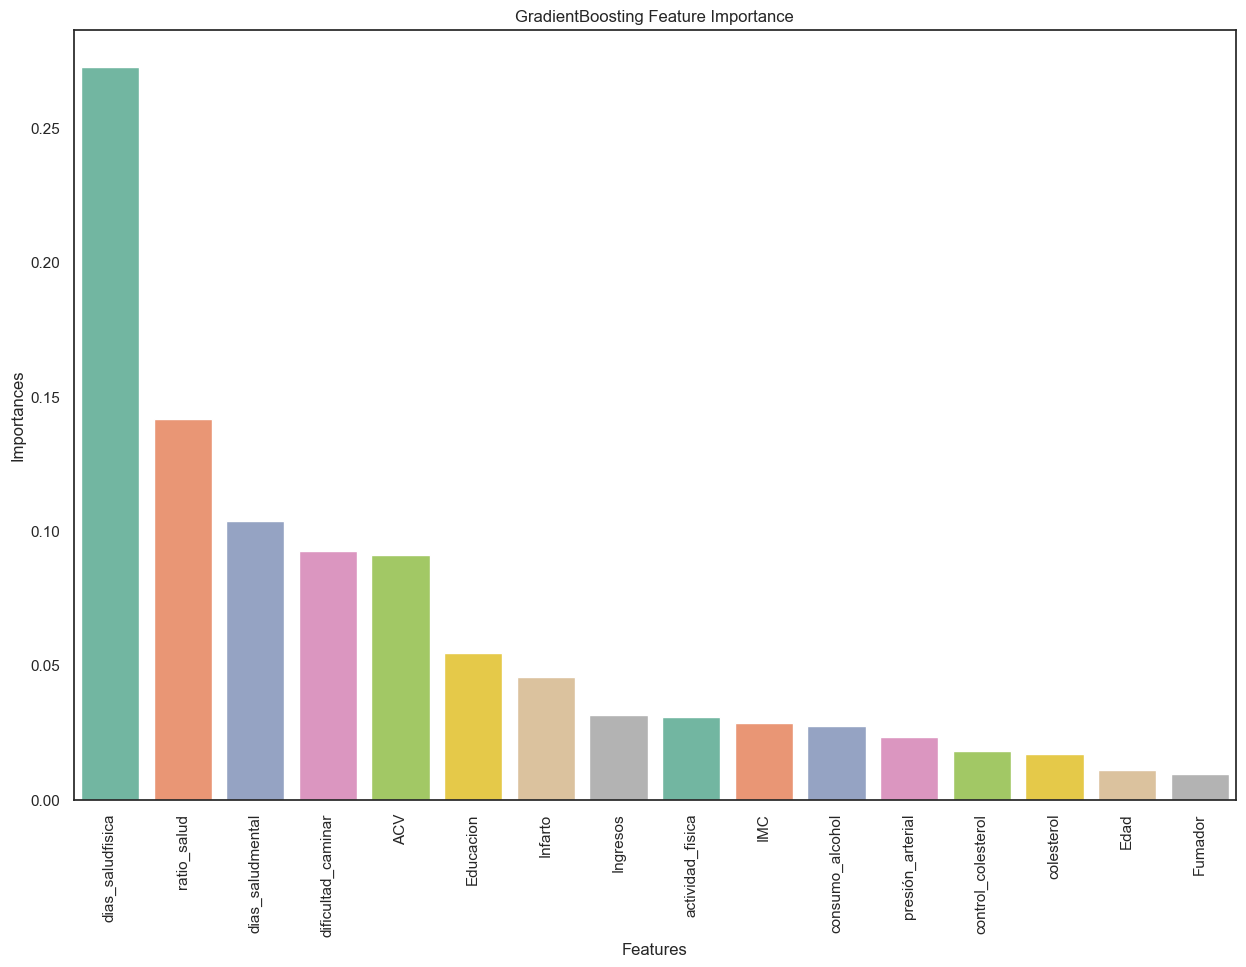

In [468]:
importances_GB = GB1.feature_importances_
columns = X1.columns
df_GB = pd.DataFrame({'Features': columns, 'Importances': importances_GB})
df_GB = df_XG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_GB, palette='Set2')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [469]:
joblib.dump(GB1, 'diabetes_GB_model.joblib')

['diabetes_GB_model.joblib']

## Comparando los resultados obtenidos

In [470]:
df_metrics = pd.concat([df_metrics_LG,df_metrics_RF,df_metrics_GB_HYPEROPT,df_metrics_GraB])

In [487]:
round(df_metrics.sort_values(by = ["Accuracy_test"]  ,ascending = False),2)

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 1: LGBMClassifier,0.85,0.85,0.91,0.91,0.78,0.77,0.84,0.84,0.85,0.85
0,Modelo 3: XGBOOST,0.85,0.84,0.91,0.91,0.78,0.77,0.84,0.83,0.85,0.85
0,Modelo 4: GradientBoosting,0.85,0.84,0.90,0.90,0.78,0.77,0.84,0.83,0.85,0.84
0,Modelo 2: Random Forest,0.81,0.81,0.88,0.88,0.72,0.71,0.79,0.79,0.81,0.81


In [488]:
df_metrics_1 = df_metrics[["Modelo","Accuracy_test", "Precision_test","Recall_test","f1 score_test"]]

In [489]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics_1, id_vars=['Modelo'], value_vars=["Accuracy_test", "Precision_test","Recall_test","f1 score_test"], 
                )

df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor"})

In [490]:
df_melt 

,Modelo,Métrica,Valor
0,Modelo 1: LGBMClassifier,Accuracy_test,0.848719
1,Modelo 2: Random Forest,Accuracy_test,0.806117
2,Modelo 3: XGBOOST,Accuracy_test,0.844944
3,Modelo 4: GradientBoosting,Accuracy_test,0.844440
4,Modelo 1: LGBMClassifier,Precision_test,0.913918
5,Modelo 2: Random Forest,Precision_test,0.880216
6,Modelo 3: XGBOOST,Precision_test,0.906117
7,Modelo 4: GradientBoosting,Precision_test,0.902930
8,Modelo 1: LGBMClassifier,Recall_test,0.772278
9,Modelo 2: Random Forest,Recall_test,0.711786


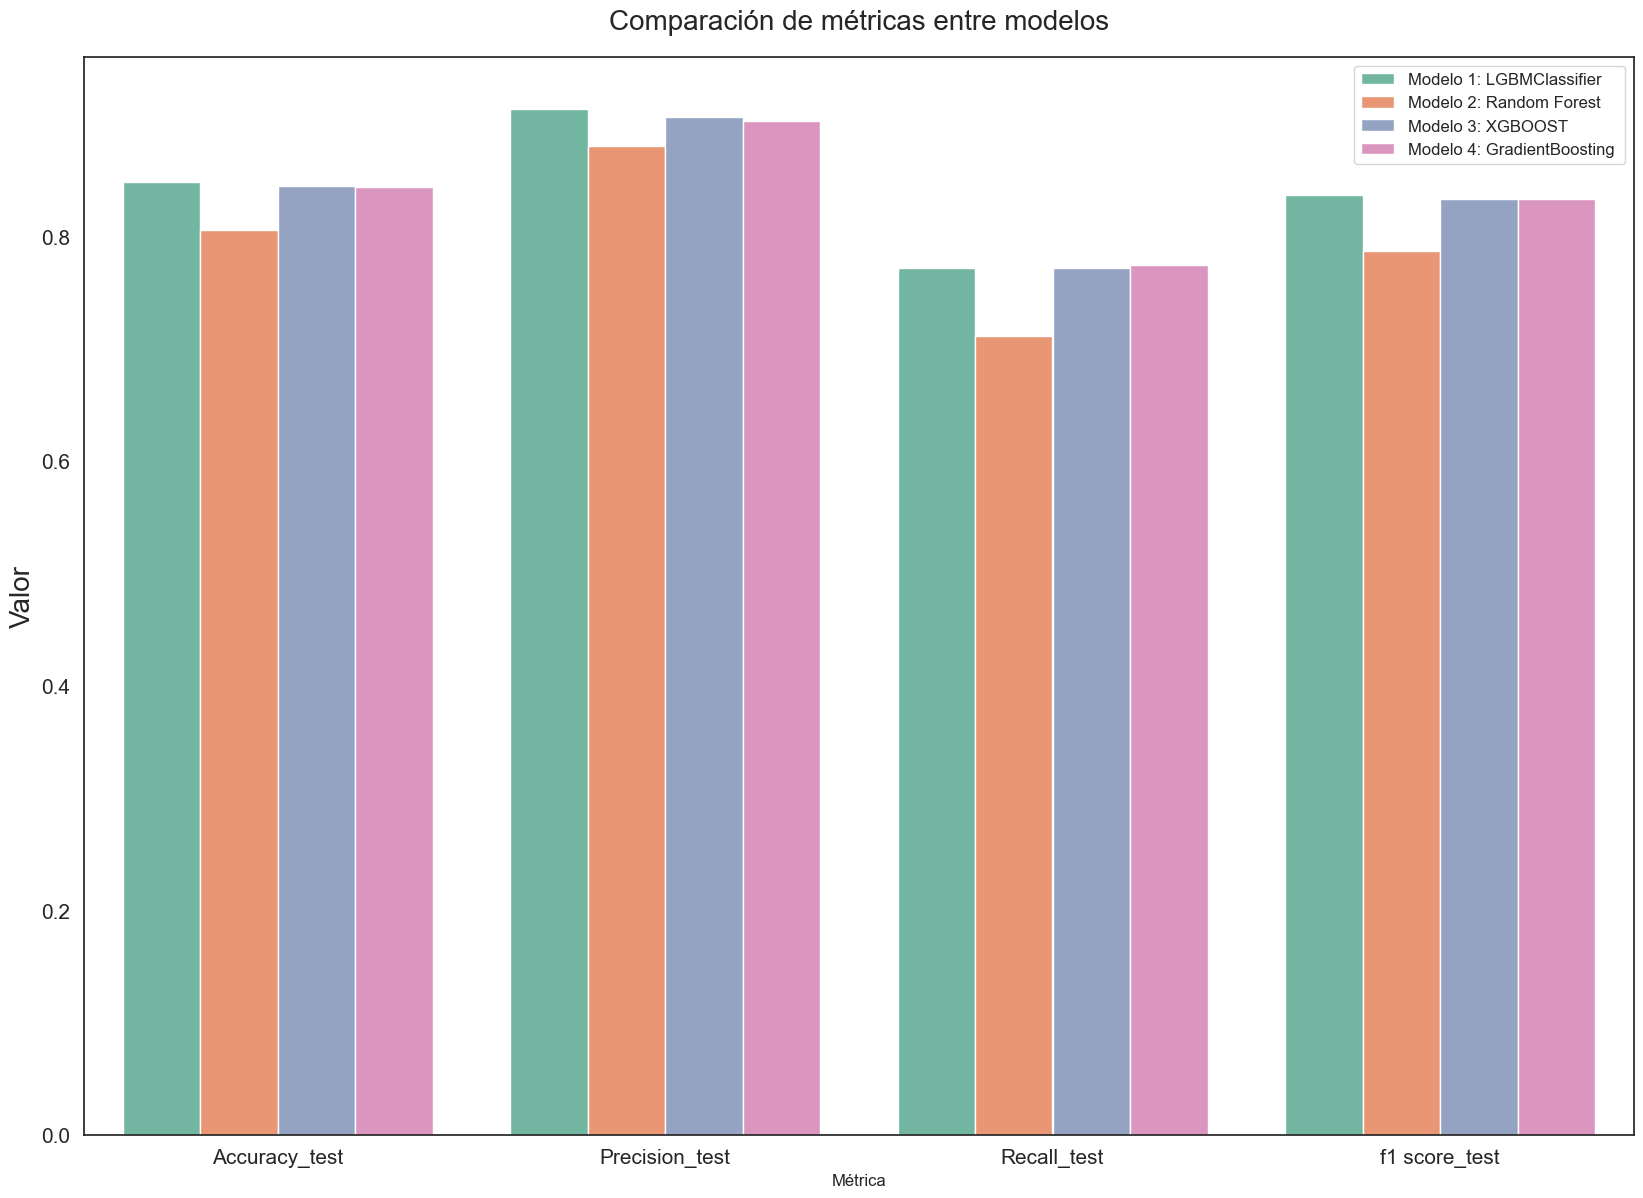

In [498]:
# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt, palette = "Set2")
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=20)
ax.tick_params(labelsize=15)
plt.legend(loc='upper right', fontsize='medium')

plt.show()

## Conclusiones



El conjunto de datos de indicadores de salud de la diabetes en Kaggle es un recurso interesante para explorar técnicas de aprendizaje automático en el campo de la salud. 
Al utilizar este tipo de datos, los investigadores y los profesionales de la salud pueden obtener información sobre los diversos factores que contribuyen al desarrollo y control de la diabetes. Con la ayuda de algoritmos de aprendizaje automático, es posible identificar patrones y predecir resultados que pueden ayudar en el diagnóstico temprano y la prevención de la enfermedad.

El dataset proporciona una descripción general de varios indicadores de salud, en mi opinión, las preguntas de esta encuesta no proporcionan atributos que permitan brindar predicciones precisas sobre si una persona tiene o no diabetes, ya que carece de indicadores fundamentales como puede ser la glucosa en sangre, sin embargo, podemos sacar conclusiones sobre qué factores influyen en mayor medida en las personas que hoy sufren la enfermedad y según estas características o atributos sugerir a las personas con mayores riesgos que realicen los estudios médicos necesarios que permitan confirmar o descartar la hipótesis. 


En este proyecto se han explorado técnicas de balanceo de datos y algoritmos de clasificación de aprendizaje automático con el objetivo de obtener un modelo predictivo con una recall minima del 75 % a partir de un dataset público. 
Se realizó una comparación entre todos los algoritmos entrenados, y se estableció que el algoritmo Xgboost,LGBMClassifier y   GradientBoosting obtuvieron la misma recall del 77% para los datos de test.

Analizando el resto de las metricas calculadas, el algoritmo que ofrece los mejores resultados para los datos de submuestreo dentro del contexto de predecir la enfermedad de diabetes es LGBMClassifier. 
Observamos tambien que LGBMClassifier demuestra una importancia de cada atributo acorde al analisis exploratorio de datos realizado. 